# **Part A (Analysis of the Given Dataset)**

Dataset Description: Titanic Dataset

![](https://cdn.pixabay.com/photo/2021/03/04/16/32/ship-6068668_1280.png)

Data Dictionary:


1.	'Survival': 0 = No, 1 = Yes
2.	'Pclass': Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
3.	'Sex': Sex
4.	'Age': Age in years
5.	'SibSp':  siblings/spouses aboard 
6.	'Parch':  parents/children aboard 
7.	'Ticket': Ticket number
8.	'Fare': Passenger fare
9.	'Cabin': Cabin number
10.	'Embarked': Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton


The data has been split into two groups:
1.	training set (train.csv)
2.	test set     (test.csv (without output (Survived)))
3.  test set output (Survived) given in this csv file (gender_submission.csv)

\\
The training set should be used to build your machine-learning models. 

The test set should be used to see how well your model performs on unseen data.







## 1. Provide an overview of the given Dataset including the Dataset Characteristics and Exploratory Data Analysis, data preprocessing and performance of different ML models. This section should be written after completing Part A. 

The dataset includes the name of each passenger as well as other information such as the fare class, the fare price, the person's age and gender, and whether that person survived the sinking of the ship. Based on the dataset, we will build a classification model that predicts whether a passenger will survive or not . We will use logistic regression as the learning algorithm.
We visualize the colums with each variable and generated a corelation matrix to understand the relation with target variable.In order to develop an efficient model we have to process the data.

**Data Preprocessing Steps** 
To process the data,we checked the presence of duplicate values and missing values.The datset (which will be trained) contains 123 duplicate values and 12 missing values in age column .We dropped the misisng values from our datsetand replaced those missing age with median age.Our dataset contains two categorical columns . As are performing classification algorithm so we encoded the sex and embarked column.

**Feature Selection /Dimentionality reduction**

Observing and visualizing the dataset , We removed features that do not have any impact on the performance of machine learning algorithms from the dataset.For this purpose, “parch”, “cabin” and “ticket” features that have zero values in the dataset and do not have any effect on the results of the learning algorithms , that have been removed from the dataset.So there will be total 9 features including encoded columns  thorugh selection preprocessing stage.

**Performance**


We can use accuracy measure when we are working on binary classification.As our dataset is balanced enough , the chance of the  models  geting biased on classes is very less.From the Performance chart we can see that **Logistic regression with Custom  parameter (80.12%)** gives better accuracy than the other model. (79.48%)
So, **Logistic regression with Custom  parameter (80%)** model will give more accurate prediction than other models we developed .

## 2.	Dataset Characteristics and Exploratory Data Analysis

In this section, introduce your dataset. Mention number of rows, columns and other characteristics. Provide the histograms of data distribution and correlations among the variable (hints: heatmap, groupby, etc) with a suitable discussion. Try to stand out and be creative. (Add as many cells as you need). Note, we will be watching for copy-paste here.

### 2.1 Load, view data and show analysis on data. Be creative. Investigate like a detective.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import stats

In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/project/train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/project/test.csv")
gender_data = pd.read_csv("/content/drive/MyDrive/project/gender_submission.csv")

In [ ]:
display('Train Data:',train_data.head(), 'Test Data:',test_data.head(), 'Gender Data:',gender_data.head())

'Train Data:'

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


'Test Data:'

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


'Gender Data:'

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
# Merging gender table and test table to dataframe 'gender_test'
left = gender_data
right = test_data
gender_test = pd.merge(left, right, on=["PassengerId"])
gender_test


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
# Merging the created dataframe 'gender_test' to the existing dataframe 'train_data'
df = pd.concat([train_data, gender_test])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
#Show all column names
for col in df.columns:
    print(col)

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


In [ ]:
# Overview about Columns, Range, Non-Null Value Counts, Memory Usage and Data Types (#df.dtpyes)
# Code Here
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


In [ ]:
# Count rows and coulums

rows =df.shape[0]  
cols = df.shape[1] 
print(rows) 
print(cols)

1309
12


In [ ]:
# Total cells in the dataset
# Code Here
print(df.count())

PassengerId    1309
Survived       1309
Pclass         1309
Name           1309
Sex            1309
Age            1046
SibSp          1309
Parch          1309
Ticket         1309
Fare           1308
Cabin           295
Embarked       1307
dtype: int64


### 2.2 Data Cleaning









#### Identifying duplicate values


In [ ]:
# Code Here
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
413    False
414    False
415    False
416    False
417    False
Length: 1309, dtype: bool

In [ ]:
df.duplicated().sum()

0

#### Identifying missing values


In [ ]:
# Find the amount of missing values in each column
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [ ]:
# Calculating the percentage of missing values:
df.isnull().sum()/len(df)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.200917
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000764
Cabin          0.774637
Embarked       0.001528
dtype: float64

#### Visualisation of missing data


     PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
413        False     False   False  False  False   True  False  False   False   
414        False     False   False  False  False  False  False  False   False   
415        False     False   False  False  False  False  False  False   False   
416        False     False   False  False  False   True  False  False   False   
417        False     False   False  False  False   True  False  False   False   

      Fare  Cabin  Embarked

<Axes: >

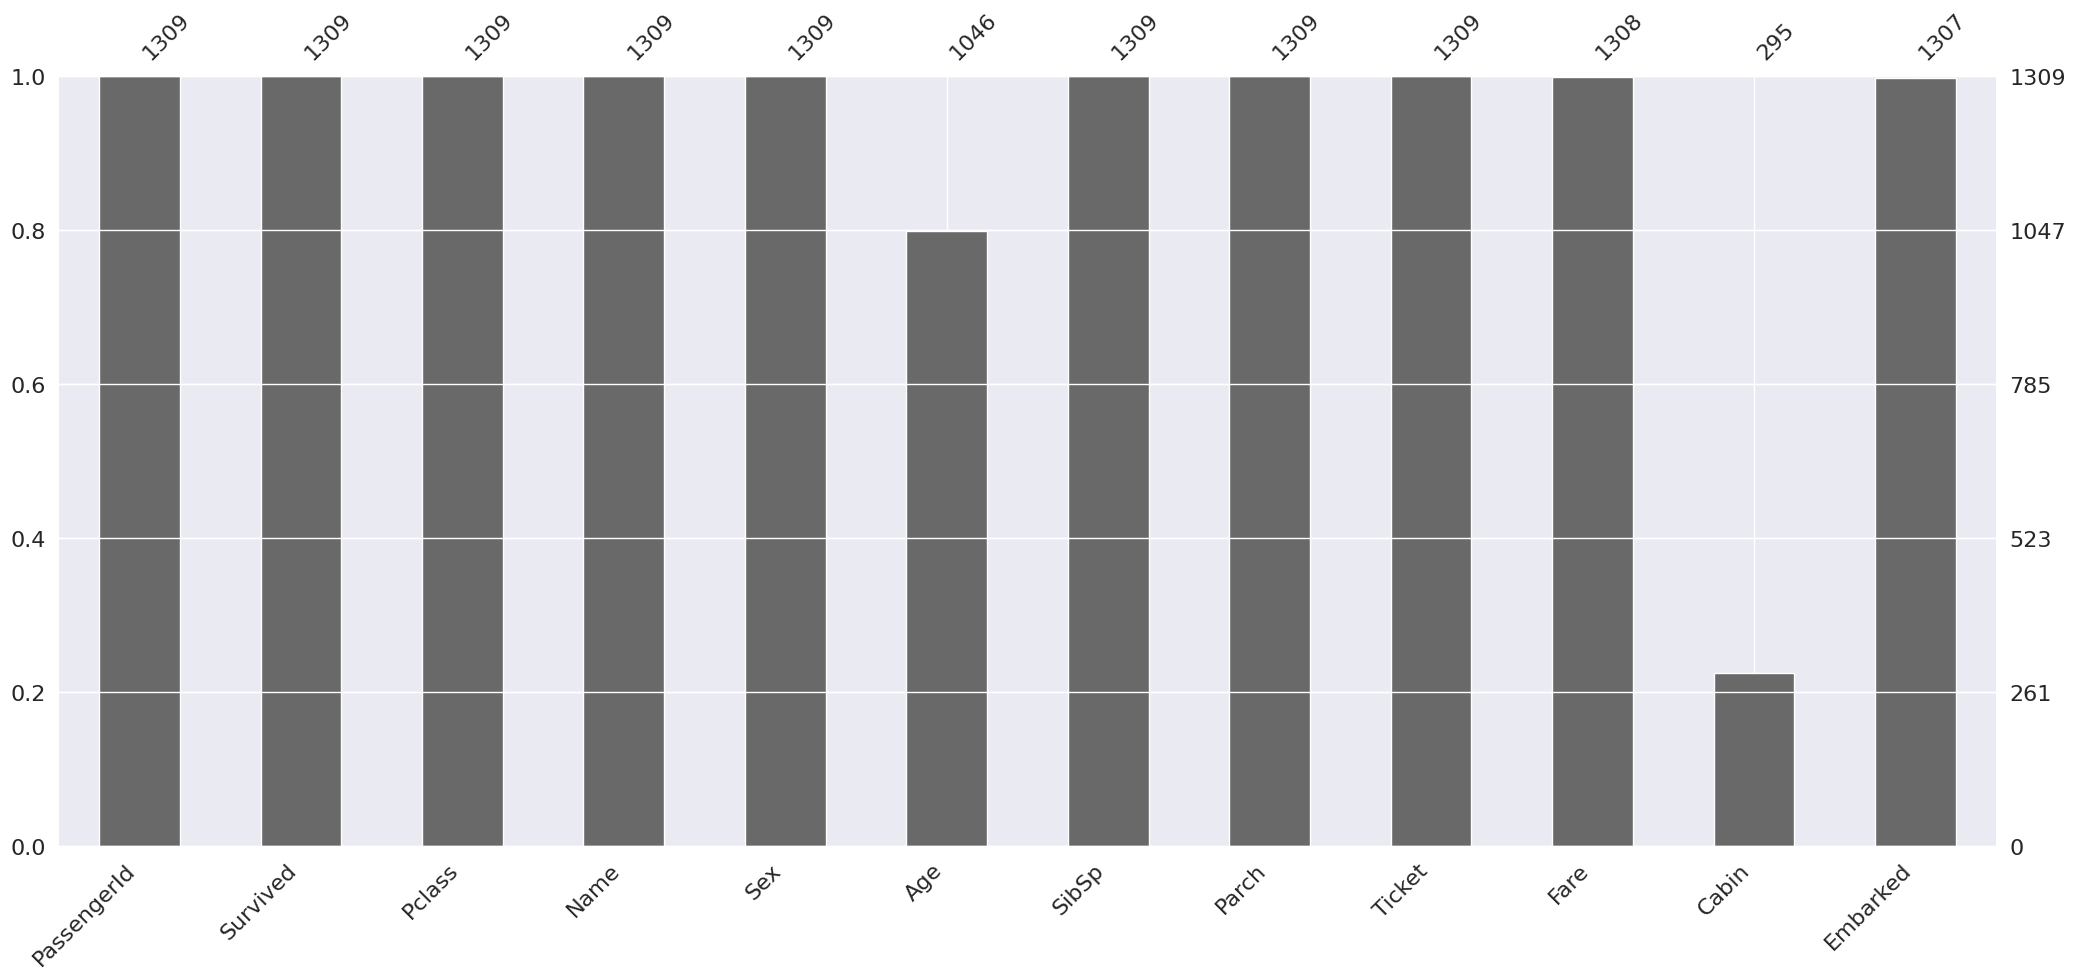

In [ ]:
# Detect missing values

import missingno as msno
print(df.isnull())
# Visualisation
msno.bar(df)

#### Dealing with missing values. Fix the missing value problem.



1.   Do analysis using plots. Fix issues.

2.   Provide an appropriate discussion




**Missing Ages**

Text(0, 0.5, 'Frequencies')

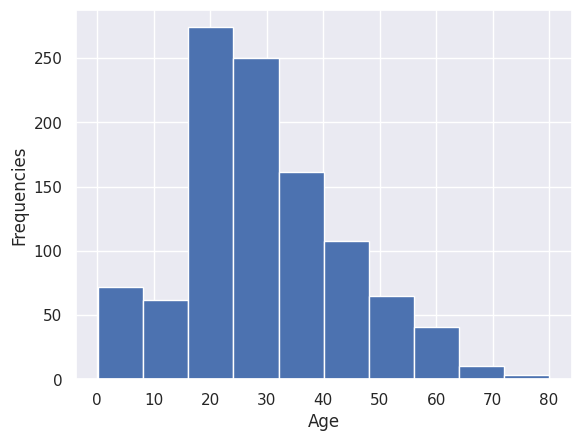

In [ ]:
plt.hist(df['Age'])
plt.xlabel('Age')
plt.ylabel('Frequencies')

In [ ]:
#Getting the mean Value

x=df['Age'].median()
print(x)

28.0


In [ ]:
#replacing with median due to the preence of outliers
df['Age']= df['Age'].fillna(df['Age'].median())

In [ ]:
mean_age = round(df['Age'].mean(), 1)
print(mean_age)

29.5


**Missing Fare**

In [ ]:
mode_fare=df['Fare'].mode()
print(df['Fare'].mean())
# look at missing values for Embarked column
df[df['Fare'].isnull()]

33.29547928134557


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,0,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [ ]:
df['Fare'] = df['Fare'].fillna(df['Fare'].mode()[0])

In [ ]:
print(df['Fare'].mean())

33.27619320091673


**Missing Embarked**

In [ ]:
df[df['Embarked'].isnull()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [ ]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

**Missing Cabin**


In [ ]:
df[df['Cabin'].isnull()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,0,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,NaN,S
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,NaN,S


In [ ]:
df.drop(columns='Cabin', inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Embarked     1309 non-null   object 
dtypes: float64(2), int64(5), object(4)
memory usage: 122.7+ KB


 ##### Discuss your findings

 From the overall dataset after laoding,viewing,merging(new columns and rows) and analysed the data we figured out that there are total of 1309 rows and 12 columns in the dataset.

We didn't identify any duplicate data from the dataset but we did identify a lot of missing values in the dataset like in column 'Age' we found out that there are about 263 missing values and in column 'fare' we get 1 missing value not only that we also get 2 missing values in column 'Embarked'.But, the most worriable that we found about 1014 missing values in column 'Cabin' which was around 77 percent of that column Entries.So, we simply drop that column from the whole dataset because it will not effect that much in ML model rather it will lower the cost of memory usage.

Well before dropping the column 'cabin' the memory usage was 132.9+ KB and after the drop it came down to 122.7+ KB.

So, for dealing with the missing values since the column 'Age' has 20% percent of missing Entries what we did was identified the median of the other 80% of data from the column 'Age' because of the outliers and simply place the data in the null cells.But, for the column 'fare' and 'Embarked' we just fill out the cells with the mode of the data from the exited entries.And, as we said before we just dropped down the column 'Cabin' for fixing the issues with the missing values for the better efficiency.
 

### 2.3 Analysing Patterns using Visualisations

The data type of 'Sex' is an object, which will not be visible in a correlation. So, if we like to include the values of the column 'Sex' into the correlation matrix by creating a new column 'Sex_Number' and set the value 'female' to '1' and 'male' to '0'. 

In [ ]:
# Creating a new column 'SexNo' with the values '1' for 'female' and '0' for 'male'
df['Sex_Number'] = np.where((df['Sex'] == "female"), 1, 0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_Number
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


#### 2.3.1 Visualization of column correlation (use groupby). Also, plot Heat Map

In [ ]:
# Correlation table including the new column 'SexNo'
correlation = df.corr()
correlation


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_Number
PassengerId,1.000000,-0.020370,-0.038354,0.025799,-0.055224,0.008942,0.031029,-0.013406
Survived,-0.020370,1.000000,-0.264710,-0.043286,0.002370,0.108919,0.233837,0.688371
Pclass,-0.038354,-0.264710,1.000000,-0.377908,0.060832,0.018322,-0.558740,-0.124617
Age,0.025799,-0.043286,-0.377908,1.000000,-0.189972,-0.125851,0.177948,-0.053663
SibSp,-0.055224,0.002370,0.060832,-0.189972,1.000000,0.373587,0.160388,0.109609
Parch,0.008942,0.108919,0.018322,-0.125851,0.373587,1.000000,0.221668,0.213125
Fare,0.031029,0.233837,-0.558740,0.177948,0.160388,0.221668,1.000000,0.185744
Sex_Number,-0.013406,0.688371,-0.124617,-0.053663,0.109609,0.213125,0.185744,1.000000


Correlation heatmaps are a type of plot that visualize the strength of relationships between numerical variables. Correlation plots are used to understand which variables are related to each other and the strength of this relationship.

**seaborn.heatmap**

Plot rectangular data as a color-encoded matrix.

This is an Axes-level function and will draw the heatmap into the currently-active Axes if none is provided to the ax argument. Part of this Axes space will be taken and used to plot a colormap, unless cbar is False or a separate Axes is provided to cbar_ax.

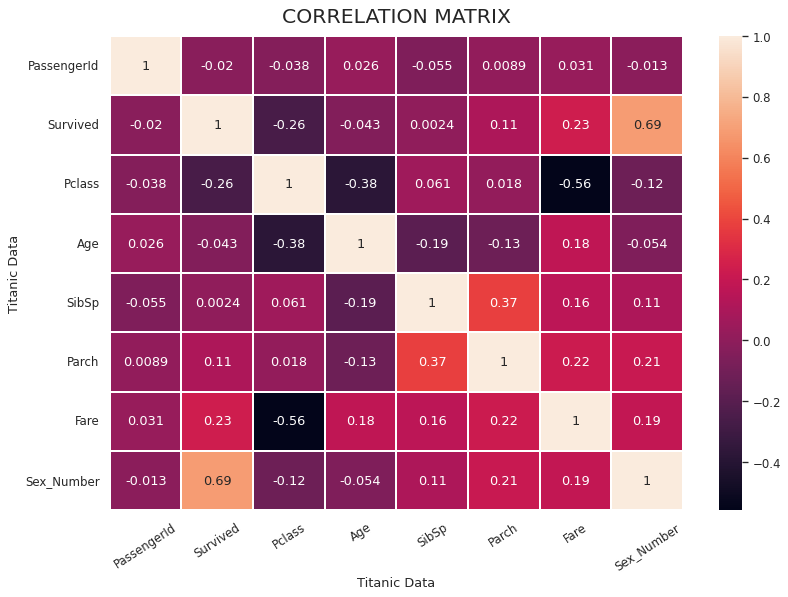

In [ ]:
# Visualisation of the corralation table


plt.figure(figsize=(12,8), dpi=77)
sns.heatmap(correlation, linecolor='white',linewidths=0.1, annot=True)
plt.title('Correlation Matrix'.upper(), size=19, pad=13)
plt.xlabel('Titanic Data')
plt.ylabel('Titanic Data')
plt.xticks(rotation=33)
plt.show()

 What do you undersend/find from the analysis above (section 2.3.1)? Write in your own words in this cell.

Write below:

In above 2.3.1 section we visualize the co-relation between the neumeric variables and tried to find out the strong relationship between the variables through a corealtion heatmap.It's actually shows how strongly 1 variable is related to other.Like column 'Age' it can have strong relation with the datas of column 'fare'. As we know fare can be cahnged according to the basis of age difference.

From the corelation heatmap as we can see there are rows and columns and we can easily find out the relationship by comparing the numeric values of the cells.
the negative values means there are no close relation between columns or, variables but when the values are positive there can be a relation but we always identify the closest possible positive value as the symbol of strong relationship.

From the above heatmap we can see the column sex_number and row survived has the
most closest possible value which is 0.69 after the sex_number row itself which is 1.So, we can easily say that sex_number variable and survived variable has a very close relationship on the dataset.



#### 2.3.2 Visualization of column relationships (Categorical Variables)



1.   Comparing two columns using different types of plots
2.   Comparing multiple columns using different types of plots



##### 2.3.2.1 Sex Proportion

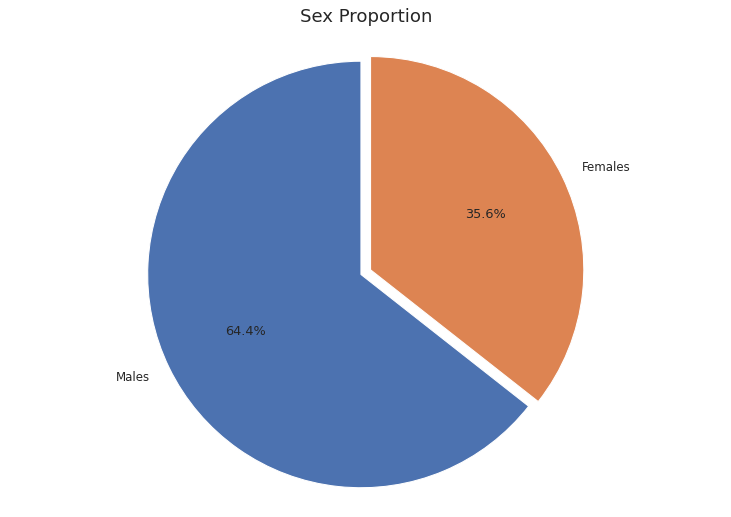

In [ ]:
male = (df['Sex'] == 'male').sum()
female = (df['Sex']== 'female').sum()
proportions = [male,female]

plt.figure(figsize=(12,8), dpi=77)
plt.pie(proportions, data=df, labels= ['Males', 'Females'], explode = (0.05,0), startangle=90, autopct='%1.1f%%', shadow=False)
plt.axis('equal')
plt.title("Sex Proportion", size=17, pad=13)
plt.show()

 What do you undersend/find from the analysis above (section 2.3.2.1)? Write in your own words in this cell.

Write below:

From the above Analysis we used the pie plot to find out the proportion of the sex. We found out that from the total dataset 64.4 % passengers are male and other 35.6 % passengers are female.



##### 2.3.2.2 Age comparision of the people who survived and those who died

In [ ]:
# How many people survived ('Survived' == 0)
survived_data=df.Survived.value_counts().to_frame()
survived_data

,Survived
0,815
1,494


In [ ]:
pd.pivot_table(df, index="Survived", values=['Pclass','SibSp', 'Parch', 'Fare'])

,Fare,Parch,Pclass,SibSp
Survived,,,,
0,23.859702,0.311656,2.467485,0.496933
1,48.811497,0.506073,2.010121,0.502024


In [ ]:
# Amount and average age of people who survived compared to those who died.
df.groupby(['Survived']).Age.agg([len,min, max,'mean', 'median'])

,len,min,max,mean,median
Survived,,,,,
0,815,0.33,74.0,29.937926,28.0
1,494,0.17,80.0,28.785951,28.0


In [ ]:
fem_p1_s0 =df.loc[(df.Sex == 'female') & (df.Pclass == 1) & (df.SibSp == 0)].Age.median()
fem_p1_s1 =df.loc[(df.Sex == 'female') & (df.Pclass == 1) & (df.SibSp == 1)].Age.median()
fem_p1_s2 =df.loc[(df.Sex == 'female') & (df.Pclass == 1) & (df.SibSp == 2)].Age.median()
fem_p1_s3 =df.loc[(df.Sex == 'female') & (df.Pclass == 1) & (df.SibSp == 3)].Age.median()
fem_p2_s0 =df.loc[(df.Sex == 'female') & (df.Pclass == 2) & (df.SibSp == 0)].Age.median()
fem_p2_s1 =df.loc[(df.Sex == 'female') & (df.Pclass == 2) & (df.SibSp == 1)].Age.median()
fem_p2_s2 =df.loc[(df.Sex == 'female') & (df.Pclass == 2) & (df.SibSp == 2)].Age.median()
fem_p2_s3 =df.loc[(df.Sex == 'female') & (df.Pclass == 2) & (df.SibSp == 3)].Age.median()
fem_p3_s0 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 0)].Age.median()
fem_p3_s1 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 1)].Age.median()
fem_p3_s2 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 2)].Age.median()
fem_p3_s3 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 3)].Age.median()
fem_p3_s4 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 4)].Age.median()
fem_p3_s5 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 5)].Age.median()
fem_p3_s8 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 8)].Age.median()
male_p1_s0 =df.loc[(df.Sex == 'male') & (df.Pclass == 1) & (df.SibSp == 0)].Age.median()
male_p1_s1 =df.loc[(df.Sex == 'male') & (df.Pclass == 1) & (df.SibSp == 1)].Age.median()
male_p1_s2 =df.loc[(df.Sex == 'male') & (df.Pclass == 1) & (df.SibSp == 2)].Age.median()
male_p1_s3 =df.loc[(df.Sex == 'male') & (df.Pclass == 1) & (df.SibSp == 3)].Age.median()
male_p2_s0 =df.loc[(df.Sex == 'male') & (df.Pclass == 2) & (df.SibSp == 0)].Age.median()
male_p2_s1 =df.loc[(df.Sex == 'male') & (df.Pclass == 2) & (df.SibSp == 1)].Age.median()
male_p2_s2 =df.loc[(df.Sex == 'male') & (df.Pclass == 2) & (df.SibSp == 2)].Age.median()
male_p3_s0 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 0)].Age.median()
male_p3_s1 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 1)].Age.median()
male_p3_s2 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 2)].Age.median()
male_p3_s3 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 3)].Age.median()
male_p3_s4 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 4)].Age.median()
male_p3_s5 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 5)].Age.median()
male_p3_s6 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 6)].Age.median()
male_p3_s8 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 8)].Age.median()

# Filling missing values with average age of women and men in each class
def myfunc(age, pclass, sex, SibSp):
    if pd.isnull(age) and pclass==1 and sex == 'female' and SibSp == 0:
        age=fem_p1_s0
    elif pd.isnull(age) and pclass==1 and sex == 'female' and SibSp == 1:
        age=fem_p1_s1
    elif pd.isnull(age) and pclass==1 and sex == 'female' and SibSp == 2:
        age=fem_p1_s2
    elif pd.isnull(age) and pclass==1 and sex == 'female' and SibSp == 3:
        age=fem_p1_s3      
    elif pd.isnull(age) and pclass==2 and sex == 'female' and SibSp == 0:
        age=fem_p2_s0
    elif pd.isnull(age) and pclass==2 and sex == 'female' and SibSp == 1:
        age=fem_p2_s1
    elif pd.isnull(age) and pclass==2 and sex == 'female' and SibSp == 2:
        age=fem_p2_s2
    elif pd.isnull(age) and pclass==2 and sex == 'female' and SibSp == 3:
        age=fem_p2_s3
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 0:
        age=fem_p3_s0
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 1:
        age=fem_p3_s1
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 2:
        age=fem_p3_s2
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 3:
        age=fem_p3_s3
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 4:
        age=fem_p3_s4
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 5:
        age=fem_p3_s5  
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 8:
        age=df.Age.median()  
    elif pd.isnull(age) and pclass==1 and sex == 'male' and SibSp == 0:
        age=male_p1_s0
    elif pd.isnull(age) and pclass==1 and sex == 'male' and SibSp == 1:
        age=male_p1_s1
    elif pd.isnull(age) and pclass==1 and sex == 'male' and SibSp == 2:
        age=male_p1_s2
    elif pd.isnull(age) and pclass==1 and sex == 'male' and SibSp == 3:
        age=male_p1_s3      
    elif pd.isnull(age) and pclass==2 and sex == 'male' and SibSp == 0:
        age=male_p2_s0
    elif pd.isnull(age) and pclass==2 and sex == 'male' and SibSp == 1:
        age=male_p2_s1
    elif pd.isnull(age) and pclass==2 and sex == 'male' and SibSp == 2:
        age=male_p2_s2   
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 0:
        age=male_p3_s0
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 1:
        age=male_p3_s1
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 2:
        age=male_p3_s2
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 3:
        age=male_p3_s3
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 4:
        age=male_p3_s4
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 5:
        age=male_p3_s5
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 6:
        age=male_p3_s6
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 8:
        age=male_p3_s8 
    else:
        age=age
    return age

In [ ]:
# Creating a new columns 'Age_Filled_Na' with the new average age values 
df['Age_Filled'] = df.apply(lambda x: myfunc(x['Age'], x['Pclass'], x['Sex'], x['SibSp']), axis=1)

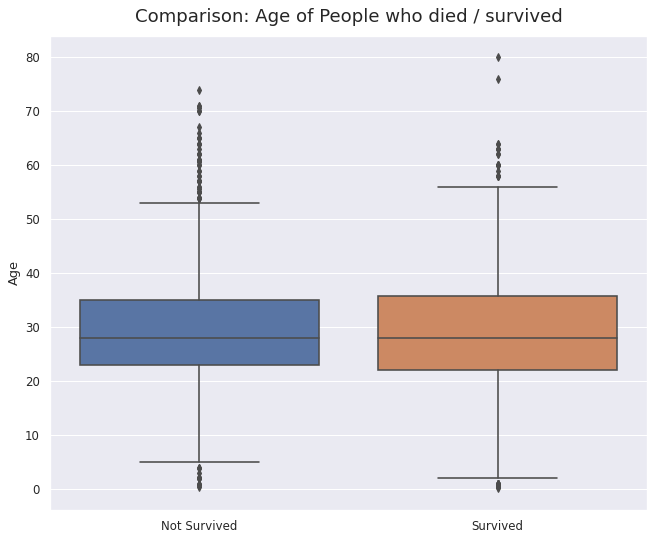

In [ ]:
# Age comparision of the people who survived and those who died using a boxplot. 
plt.figure(figsize=(10,8), dpi=77)
sns.boxplot(x="Survived", y="Age_Filled", data=df)
plt.title("Comparison: Age of People who died / survived", size=17, pad=13)
plt.ylabel('Age')
plt.xlabel(' ')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

 What do you undersend/find from the analysis above (section 2.3.2.2)? Write in your own words in this cell.

Write below:

From the above analysis from section 2.3.2.2 we first identified that how many people are died and how many are survived.

Around 494 people are survived and 815 people are died according to the dataset.After comparing the Age of the survived and died passengers we found out that people who are died had the minimum age of 33 and the maximum age of 74.And the survived people had the minimum age of 17 and the maximum of 80.

So, we can see that passengers who had the age 33 and above 33 are the victimized most but, the passengers who had the age above 17 and under 33 are the less victimized.

We also ploted a box plot for a better understanding of the process by visualizing the comparison and yeah definitely found out the Outliers there.There are a lot of outlires as we told that the maximum Age of the passengers who had died were 74 but there are passengers who were older than that age limit had survived.



##### 2.3.2.3 The barplot compares the survival 

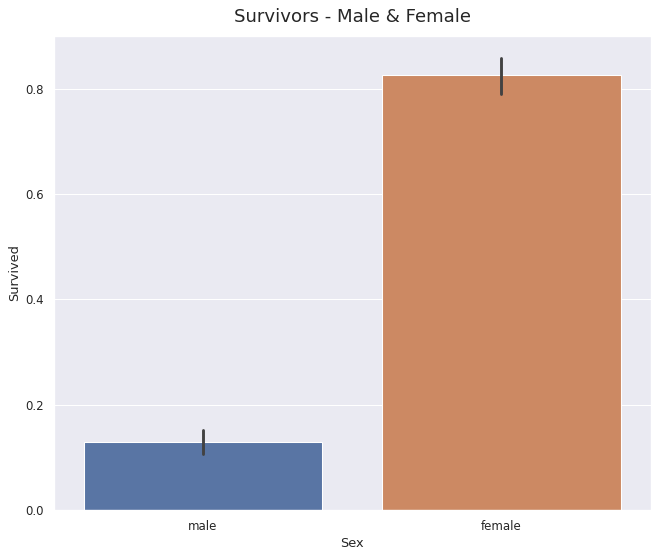

In [ ]:
plt.figure(figsize=(10,8), dpi=77)
sns.barplot(x="Sex", y="Survived", data=df)
plt.title("Survivors - Male & Female", size=17, pad=13 )
plt.show()

 What do you undersend/find from the analysis above (section 2.3.2.3)? Write in your own words in this cell.

Write below:

From the above section 2.3.2.3 we ploted a bar plot and analysed the male and the female proportion from the survivors.

According to the bar plot we identfied that from the total survived passengers the percentage of the female survivors are 87 percent and the percentage of the male passengers are around 13 percent.

##### 2.3.2.4 Comparison: Survivors - Male & Female

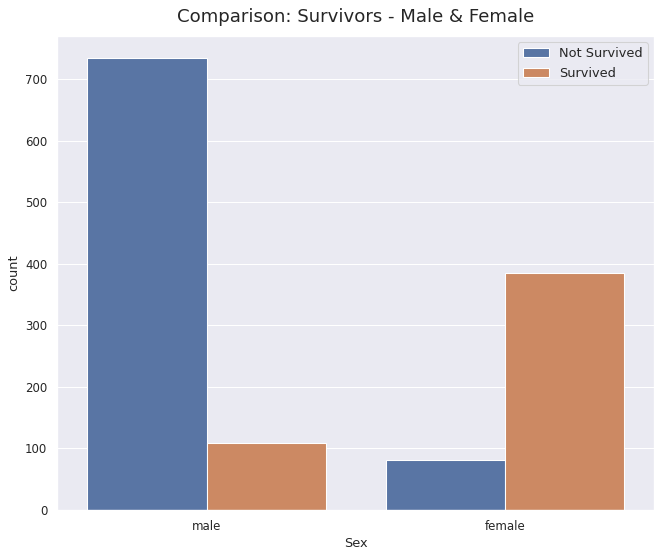

In [ ]:
plt.figure(figsize=(10,8), dpi=77)
sns.countplot(x=df['Sex'],hue=df['Survived'])
plt.title("Comparison: Survivors - Male & Female", size=17, pad= 13)
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 12})
plt.show()

 What do you undersend/find from the analysis above (section 2.3.2.4)? Write in your own words in this cell.

Write below:

According to the plotted figure from above section 2.3.2.4 blue bar is representing the passengers who are not survived and the orange bar is representing the passengers who are survived.

And we can see since the percentage of the male passengers were greater it's normal to find out that the death of the male passengers are greater in numbers. Around 750 passengers were dead from male sex and around 100 passengers were survived.And for the Opposite sex around 80 passengers were survived and around 380 passengers were dead.

In [ ]:
# Find percentage of women who survived
total_female = (df['Sex']=='female' ).sum()
#df.groupby(by = ['Survived','Sex']).count()
#x=df[df['Survived'] == 0].groupby(['Sex']).count().iloc[:,-1:]


#print(total_female)
female_survived=len(df[(df['Sex']=='female') & (df['Survived']==0)])
#print(female_survived)

print((female_survived * 100)/total_female)


17.38197424892704


In [ ]:
# Find percentage of men who survived
total_male = (df['Sex']=='male' ).sum()
male_survived=len(df[(df['Sex']=='male') & (df['Survived']==0)])
print((male_survived * 100)/total_male)


87.0699881376038


##### 2.3.2.5 Compares the chance of survival for each ticket class

In [ ]:
df['Pclass'].value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

In [ ]:
df.groupby(['Pclass', 'Survived']).Age.agg([len])

len
Pclass Survived     
1      0         137
       1         186
2      0         160
       1         117
3      0         518
       1         191

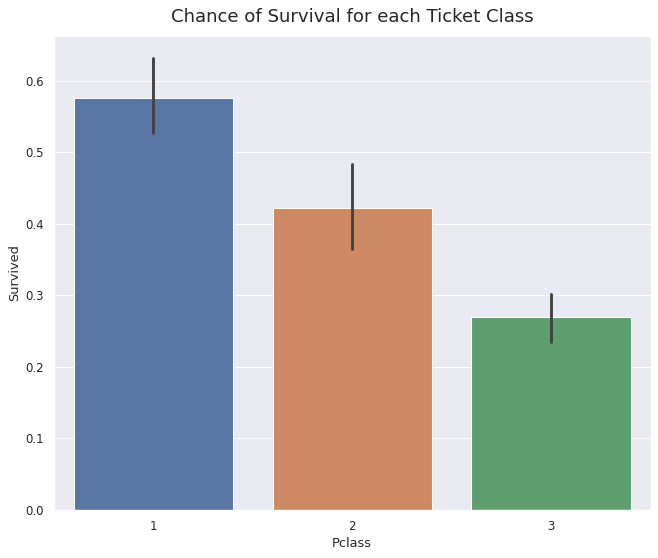

In [ ]:
plt.figure(figsize=(10,8), dpi=77)
sns.barplot(x="Pclass", y="Survived", data=df)
plt.title("Chance of Survival for each Ticket Class", size=17, pad=13)
plt.show()

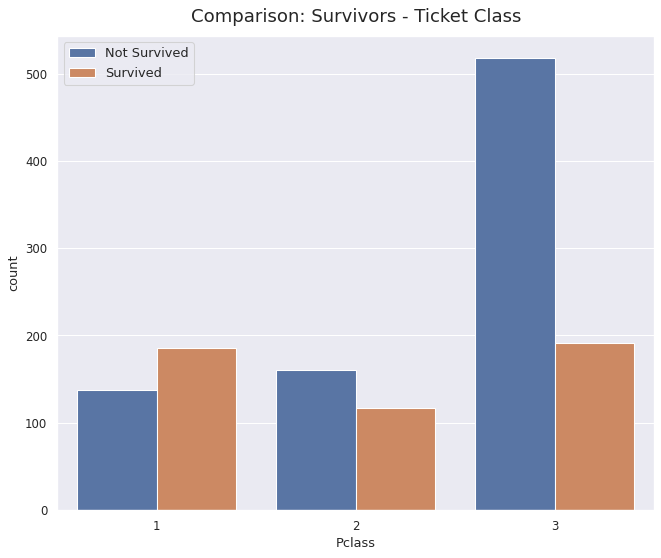

In [ ]:
# Survived and not survived compared for each ticket class
plt.figure(figsize=(10,8), dpi=77)
sns.countplot(x=df['Pclass'],hue=df['Survived'])
plt.title("Comparison: Survivors - Ticket Class", size=17, pad=13)
plt.legend(['Not Survived', 'Survived'], loc='upper left', prop={'size': 12})
plt.show()

 What do you undersend/find from the analysis above (section 2.3.2.5)? Write in your own words in this cell.

Write below:

In the above section 2.3.2.5 we plotted figures to compare the chances of survival from each ticket class.

First from the bar plot we can see that passengers with the first class ticket has the most percentage of the survival which is around 58 percent.And, then comes to the second class ticket holder who had the survival rate of around 42 percent and finally the 3rd class ticket holder had the survival rate of around 28 percent.

Then, we countplot a figure to find out the Actual numbers of the death and survivors from each ticket class,where blue bare represnt the people who are dead and the orange bar represnt the people who are survived.

And yes 3rd class ticket holder had the maximum deaths above 500 people were died from that ticket class and less than 200 people were survived.And, then sequentially comes the 2nd class ticket holder and 1st class ticket holder.

##### 2.3.2.6 Chance of Survival for Passengers with Parents or Children

In [ ]:
# Amount and average age of women and man of each class who survived compared to those who died.
df.groupby(['Sex','Survived', 'Pclass']).Age.agg([len,min, max,'mean'])

len    min   max       mean
Sex    Survived Pclass                             
female 0        1         3   2.00  50.0  25.666667
                2         6  24.00  57.0  36.000000
                3        72   2.00  48.0  24.805556
       1        1       141  14.00  76.0  36.574468
                2       100   0.92  60.0  27.004200
                3       144   0.17  63.0  23.459514
male   0        1       134   6.00  71.0  40.220149
                2       154   2.00  70.0  32.055195
                3       446   0.33  74.0  26.893296
       1        1        45   0.92  80.0  35.331556
                2        17   0.67  62.0  17.431176
                3        47   0.42  45.0  23.370638

In [ ]:
df['Parch'].value_counts().to_frame()

,Parch
0,1002
1,170
2,113
3,8
5,6
4,6
6,2
9,2


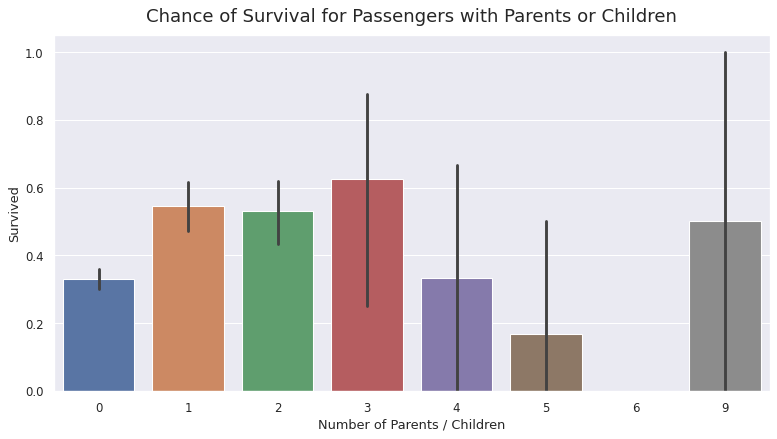

In [ ]:
plt.figure(figsize=(12,6), dpi=77)
sns.barplot(x="Parch", y="Survived", data=df)
plt.title("Chance of Survival for Passengers with Parents or Children", size=17, pad=13)
plt.xlabel('Number of Parents / Children')
plt.show()

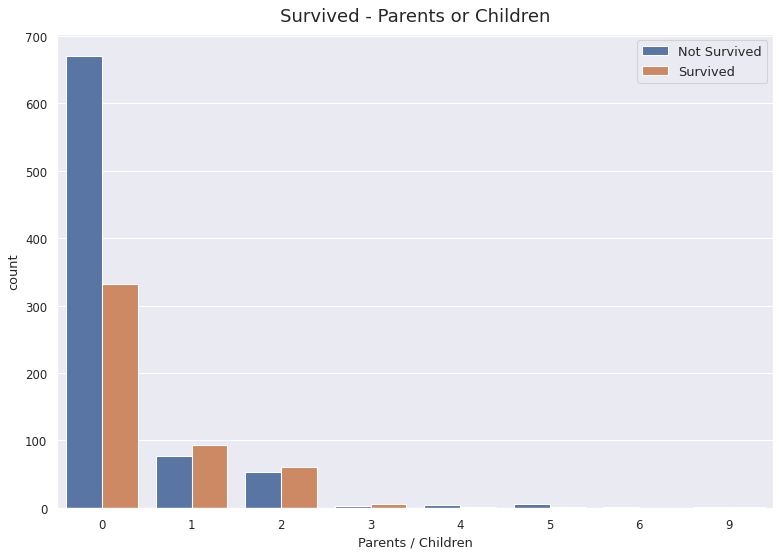

In [ ]:
plt.figure(figsize=(12,8), dpi=77)
sns.countplot(x=df['Parch'],hue=df['Survived'])
plt.title("Survived - Parents or Children", size=17, pad=12)
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 12})
plt.xlabel('Parents / Children')
plt.show()

In [ ]:
# Age of people with parents or children
df.groupby(['Parch','Survived']).Age.agg([len, min, max])

len    min   max
Parch Survived                  
0     0         670  11.00  74.0
      1         332   5.00  80.0
1     0          77   0.75  70.0
      1          93   0.42  64.0
2     0          53   0.33  58.0
      1          60   0.17  64.0
3     0           3  16.00  61.0
      1           5  24.00  54.0
4     0           4  29.00  64.0
      1           2  28.00  60.0
5     0           5  39.00  41.0
      1           1  38.00  38.0
6     0           2  40.00  43.0
9     0           1  28.00  28.0
      1           1  28.00  28.0

 What do you undersend/find from the analysis above (section 2.3.2.6)? Write in your own words in this cell.

Write below:

From the above 2.3.2.6 section we tried to find out the chance of survival of the passengers with parents and childrens.

At the first bar plot figure we can see that passengers with no children or, parents have the survival rate of 35 percent or, we can say below 40 percent. then, passengers with 1 or, 2 parch have the survival rate of above 50 percent and under 50 percent estimated call is 55 and 54 percent.But, the passengers who have 3 parch members have the highest survival rate which is above 60 percent.then, again the survival rate decreased to below 40 percent for having 4,5 parch members.But, surprisingly passengers who have 9 parch members has the survival rate of almost 50 percent.

From the 2nd plotted figure we identified the Actual number of survivors with parents and childrens. we can see that passengers with 0 parch members have the most death rate and around 670 passengers were died who had no parch members and around 332 passengers were survived with 0 parch members.Sequentially -

93 were survived and 77 were died those who had 1 parch members.

63 were survived and 53 were died those who had 2 parch members.

5 were survived and 3 were died those who had 3 parch members.

2 were survived and 4 were died those who had 4 parch members.

1 was survived and 5 were died those who had 5 parch members.

No, survivors and 2 were died those who had 6 parch members.

1 was survived and no one died those who had 9 parch members.

And finally, estimated maximum and minimum age of the survived and the non-survived passengers.

##### 2.3.2.7 This barplot compares the chance of survival within a category

In [ ]:
df.SibSp.value_counts()

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

In [ ]:
df.groupby(['SibSp','Survived']).Age.agg([len, 'mean'])

len       mean
SibSp Survived                
0     0         593  30.679865
      1         298  29.383389
1     0         153  32.789216
      1         166  28.744036
2     0          23  24.478261
      1          19  23.868421
3     0          15  15.666667
      1           5  27.600000
4     0          18   7.222222
      1           4  15.750000
5     0           5  10.200000
      1           1  10.000000
8     0           8  26.312500
      1           1  28.000000

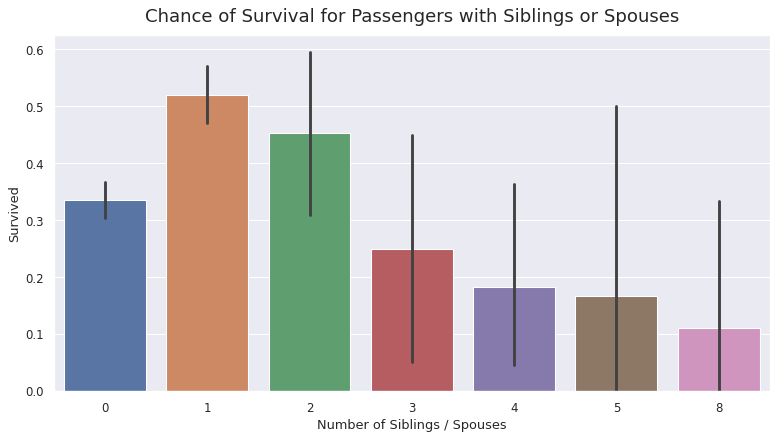

In [ ]:
# This barplot compares the chance of survival within a category
plt.figure(figsize=(12,6), dpi=77)
sns.barplot(x="SibSp", y="Survived", data=df)
plt.title("Chance of Survival for Passengers with Siblings or Spouses", size=17, pad=13)
plt.xlabel('Number of Siblings / Spouses')
plt.show()

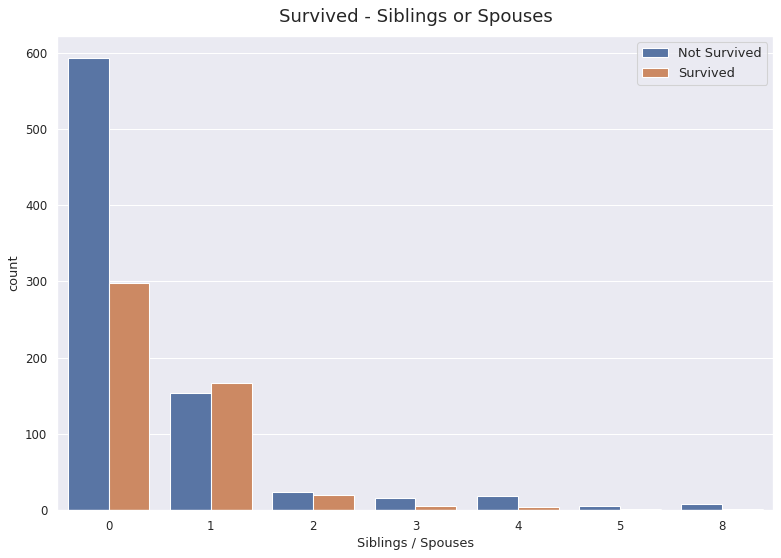

In [ ]:
plt.figure(figsize=(12,8), dpi=77)
sns.countplot(x=df['SibSp'],hue=df['Survived'])
plt.title("Survived - Siblings or Spouses", size=17, pad=13)
plt.xlabel('Siblings / Spouses')
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 12})
plt.show()

In [ ]:
df.groupby(['SibSp','Survived']).Age.agg([len, min, max, 'mean'])

len    min   max       mean
SibSp Survived                             
0     0         593   0.33  74.0  30.679865
      1         298   0.42  80.0  29.383389
1     0         153   0.75  70.0  32.789216
      1         166   0.17  76.0  28.744036
2     0          23   9.00  44.0  24.478261
      1          19   0.75  59.0  23.868421
3     0          15   2.00  31.0  15.666667
      1           5  23.00  33.0  27.600000
4     0          18   1.00  16.0   7.222222
      1           4   3.00  38.0  15.750000
5     0           5   1.00  16.0  10.200000
      1           1  10.00  10.0  10.000000
8     0           8  14.50  28.0  26.312500
      1           1  28.00  28.0  28.000000

 What do you undersend/find from the analysis above (section 2.3.2.7)? Write in your own words in this cell.

Write below:

From the above section 2.3.2.7 we used two plots which is barplot and countplot to find out the chance of survival of the passengers withn siblings or, spouses.

From first barplot we found out that - 

* passengers who had no siblings or, spouses have the survival rate of 35%.
* where people with 1 sibling or, spouse have the survival rate of above 50% which is the highest survival rate from the whole plotted graph.
*Then, sequentially for 2,3,4,5 or 8 siblings/spouses the chances of survial rates are 35% ,25%, 18% , 17% and 11%.As we can see that chances of survival rate is becoming lower when the number of siblings/spouses are increasing.


From the 2nd plotted figure we identified the Actual number of survivors with siblings and spouses. we can see that passengers with 0 siblings/spouses have the most death rate and almost 600 or, 593 passengers were died who had no siblings/spouses and around 298 passengers were survived with no siblings/spouses.Sequentially -

166 were survived and 153 were died those who had 1 siblings/spouses.

19 were survived and 23 were died those who had 2 siblings/spouses.

5 were survived and 15 were died those who had 3 siblings/spouses.

4 were survived and 18 were died those who had 4 siblings/spouses.

1 was survived and 5 were died those who had 5 siblings/spouses.

No, survivors and 2 were died those who had 6 siblings/spouses.

1 was survived and 8 were died those who had 8 siblings/spouses.

And finally, estimated maximum and minimum age and also the median of the survived and the non-survived passengers who had siblings/spouses.

##### 2.3.2.8 Chance of Survival by Port of Embarkation

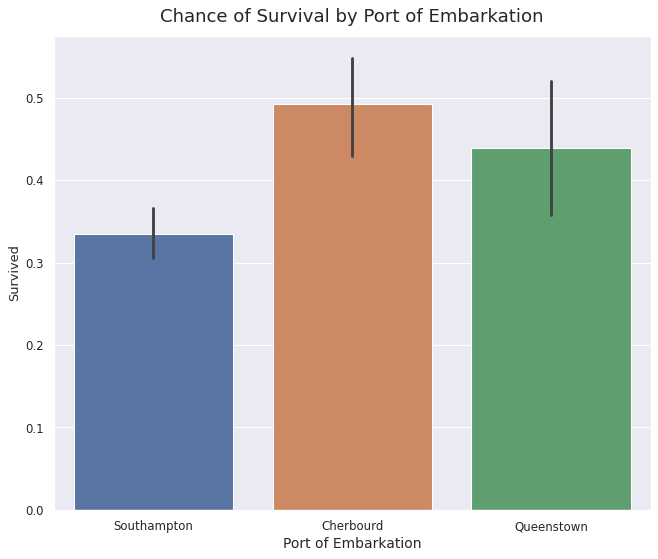

In [ ]:
plt.figure(figsize=(10,8), dpi=77)
sns.barplot(x="Embarked", y="Survived", data=df)
plt.title('Chance of Survival by Port of Embarkation', size=17, pad=13)
plt.xlabel('Port of Embarkation', size=13)
plt.xticks([0, 1, 2],['Southampton', 'Cherbourd', 'Queenstown'])
plt.show()

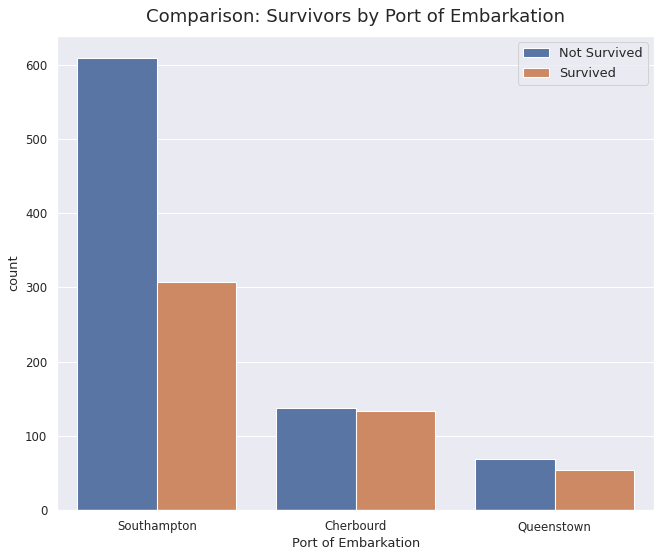

In [ ]:
plt.figure(figsize=(10,8), dpi=77)
sns.countplot(x=df['Embarked'],hue=df['Survived'])
plt.title("Comparison: Survivors by Port of Embarkation", size=17, pad=13)
plt.xlabel('Port of Embarkation')
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 12})
plt.xticks([0, 1, 2],['Southampton', 'Cherbourd', 'Queenstown'])
plt.show()

 What do you undersend/find from the analysis above (section 2.3.2.8)? Write in your own words in this cell.

Write below:

From the above section 2.3.2.8 we compared the chance of survival by port of embarkation by doing barplot and countplot.

In above barplot we identified three cities or, port like southampton, cherbound, queenstown and tried to find out the chance of survival of the passengers who embarked from those port.

From the barplot we can see that the maximum chances of survial rate is from cherbound port which is almost around 48% and the minimum chances of the survival rate is from southampton port which is almost around 34% or we can say above 30%.And, from queenstown the survival rate is almost around 44% or, above 40%.

And, From the count plot we can estimated the number of survivors and how many actually died from each port of embarkation and can compare it. Like, most of the passengers from southampton port so the number of not survived passengers were greater in southampton which is almost above 600 and the number of survivors is also greater in southampton which is above 300.Besides the number of survibors from chebound is above 100 and the number of death also is above 100.The death rate and the survived rate is almost proportionate to each other in cherbound port.And finally, Queenstown has the lesser survivors and lesser death comparison to the other port of embarkation since the number of passengers were lesser than the other port.

##### 2.3.2.9 Average Age of Passengers with Siblings and  Parents or Children

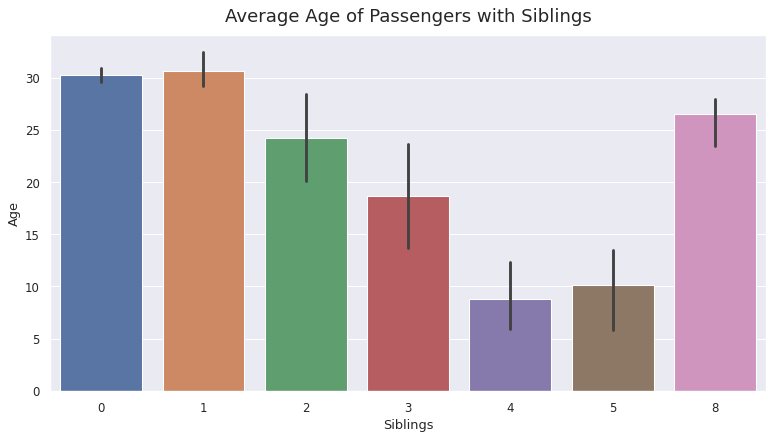

In [ ]:
plt.figure(figsize=(12,6), dpi=77)
sns.barplot(x="SibSp", y="Age", data=df)
plt.title('Average Age of Passengers with Siblings', size=17, pad=13)
plt.xlabel('Siblings')
plt.show()

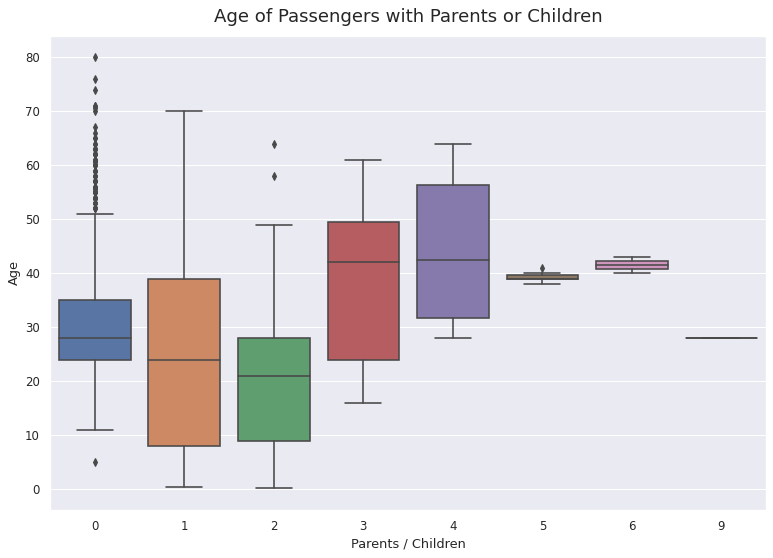

In [ ]:
plt.figure(figsize=(12,8), dpi=77)
sns.boxplot(x="Parch", y="Age", data=df)
plt.title('Age of Passengers with Parents or Children', size=17, pad=13)
plt.xlabel('Parents / Children')
plt.show()

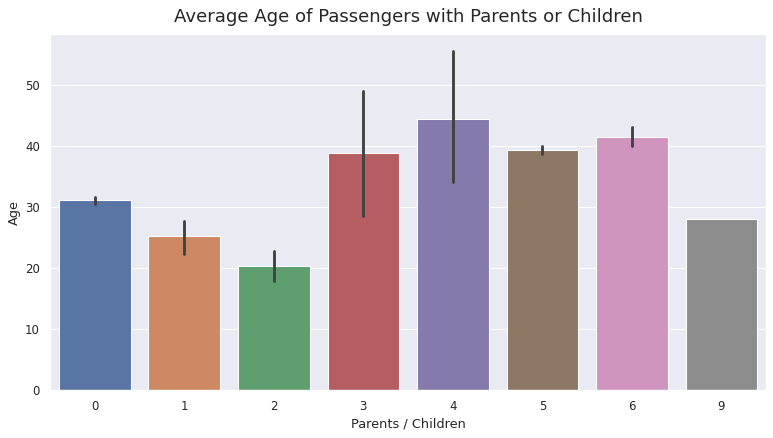

In [ ]:
plt.figure(figsize=(12,6), dpi=77)
sns.barplot(x="Parch", y="Age", data=df)
plt.title('Average Age of Passengers with Parents or Children', size=17, pad=12)
plt.xlabel('Parents / Children')
plt.show()

 What do you undersend/find from the analysis above (section 2.3.2.9)? Write in your own words in this cell.

Write below:

From the above section 2.3.2.9 we can tried to figure out the average age of the passengers who had childrens or, siblings.We used three different plot for visualizing the data and for a better understanding of the process.

First we used barplot to identify the average age of the passengers depending on the number siblings they had.Sequentially the average age of the passengers depending on their number of siblings is given below from the barplot -

Passengers who had no siblings most of their average age was 30.
Passengers who had only 1 siblings most of their average age was above 30.
Passengers who had 2 siblings most of their average age was less than 25 or, we can say in between 20 to 25.
Passengers who had 3 siblings most of their average age was less than 20 or, we can say in between 15 to 20.
Passengers who had 4 or, 5 siblings most of their average age was in between 5 to 10.
And surprisingly Passengers who had 8 siblings most of their average age was above 25. well passengers with less siblings have higer average age.
Secondly, we used box plot find out the average age of the passengers who had parents and childrens.The findings from the boxplot is given below -

Passengers who had no parents or, childrens 50% of their average age is beteen 25 to 35 since the lower quartile range is 25 and uppper quartile is 35.And, definitely there are outlires and the median is closer to 28.

Passengers who had 1 parent or, children 50% of average their age is in inter quartile range which is 8 to 39.The median of the age is 25 and there are no outlires And the T shaped whiskers got the maximum age without outlires which is 1.5 times of inter quartile range.Same goes for lower T shaped whisker.

Passengers who had 2 parents or, childrens 50% of their average age is in inter quartile range which is 9 to 28.The median of the age is 22 and there are outlires above the upper T shaped whiskerd value.

Passengers who had 3 parents or, childrens 50% of their age is in inter quartile range which is 25 to 50.The median of the age is 43 and there are no outlires And the T shaped whiskers got the maximum age without outlires which is 1.5 times of inter quartile range.And the lower whisker got the minimum value.

Passengers who had 4 parents or, childrens 50% of their age is in inter quartile range which is 32 to 57.The median of the age is 44 and there are no outlires And the T shaped whiskers got the maximum age without outlires which is 1.5 times of inter quartile range.And the lower whisker got the minimum age.

And the rest of them works just like the others but since their people with more than 4 childrens or parents are lesser there box plot is not clear that much.

Finally, we again created a barplot to show the average age of the passengers who had childrens and parents. So, that we can easily compare them with the result of the boxplot.And, satisfyingly there not that much difference. Rather boxplot actually gave a more clear view of the Datas.

##### 2.3.2.10 Age of Passengers for each Ticket Class

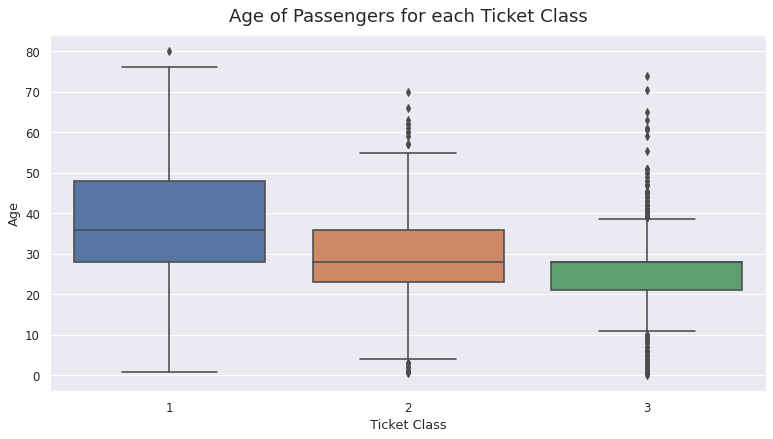

In [ ]:
plt.figure(figsize=(12,6), dpi=77)
sns.boxplot(x="Pclass", y="Age", data=df)
plt.title('Age of Passengers for each Ticket Class', size=17, pad=13)
plt.xlabel('Ticket Class')
plt.show()

 What do you undersend/find from the analysis above (section 2.3.2.10)? Write in your own words in this cell.

Write below:

From the above section 2.3.2.10 We simply plotted a boxplot to figure out the Age of the passengers depending on their ticket class.

The boxplot is describing below -

As we can see that passengers with 1st class ticket, most of their Age is between the inter quartile range which is between the 28 to 48.And, the median is 36.And, yes there are outlires above the upper T shaped whisker value.

Passengers with 2nd class ticket, most of their Age is between the inter quartile range which is between the 23 to 36.And, the median is 28.And, yes there are outlires above the upper T shaped whisker value and also under the lower T shaped whisker value.

Passengers with 3rd class ticket, most of their Age is between the inter quartile range which is between the 22 to 28.And, yes there are outlires above the upper T shaped whisker value and also under the lower T shaped whisker value as well.

##### 2.3.2.11 Comparing multiple columns

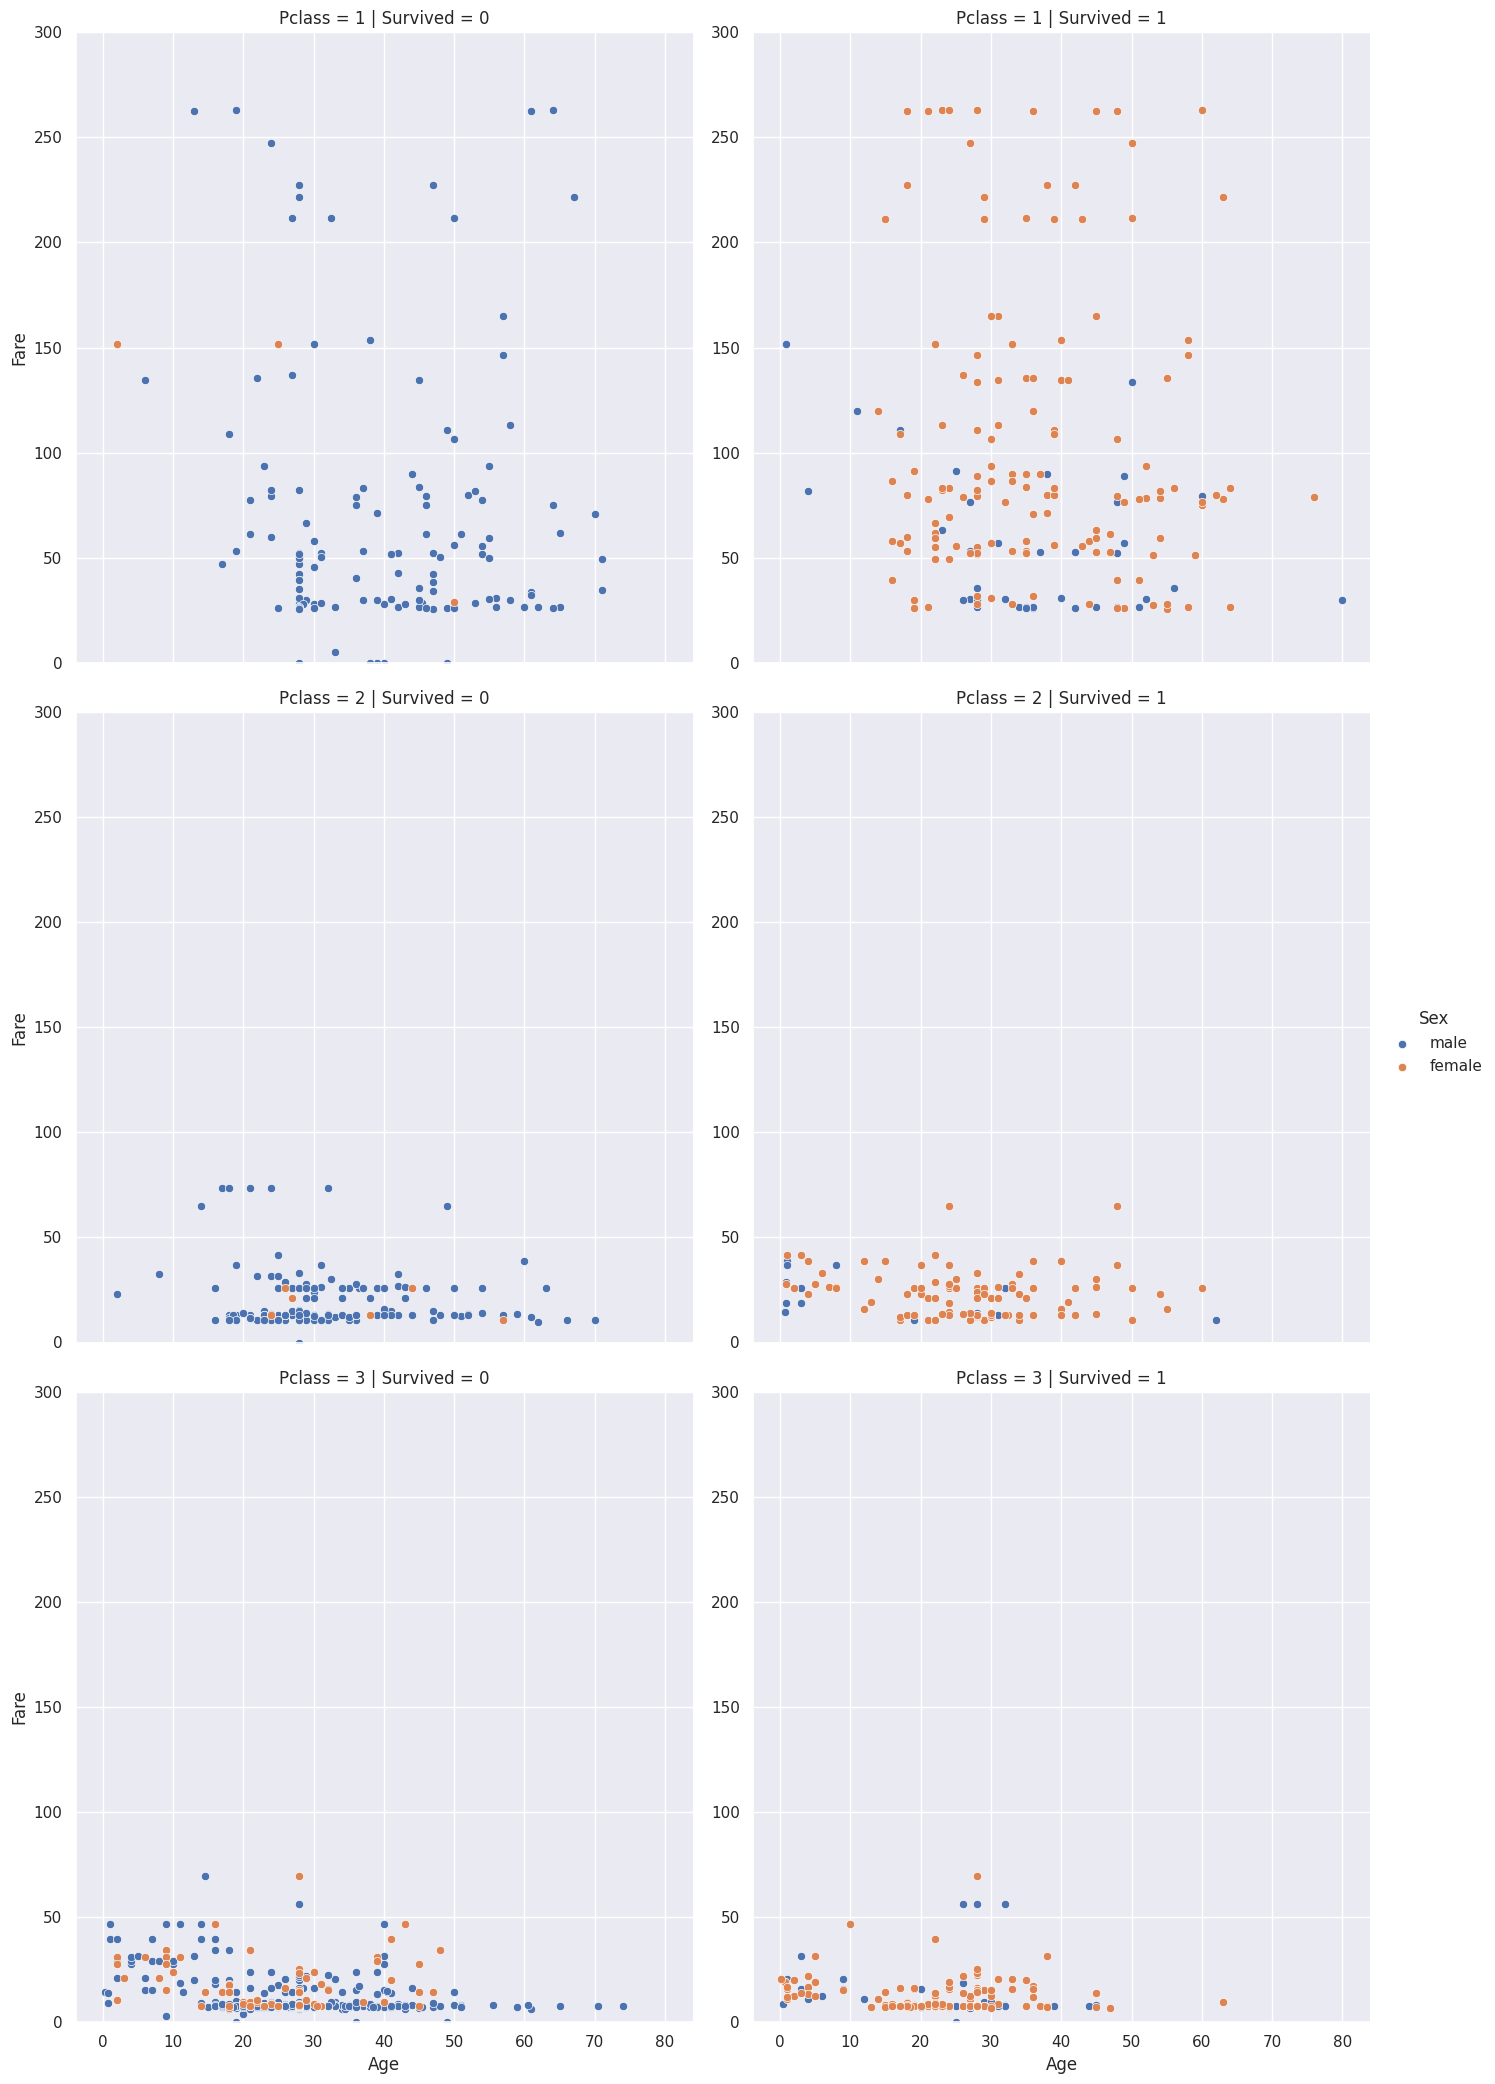

In [ ]:
# Comparison of Pclass, Age, Sex and Survivors
g = sns.FacetGrid(df, col='Survived', row='Pclass', sharey=False, ylim=(0,300), hue='Sex', height=7)
g.map_dataframe(sns.scatterplot, x='Age', y='Fare')
g.set_axis_labels('Age', 'Fare')
g.add_legend()
# g.set_titles(col_template='', row_template='')
plt.show()

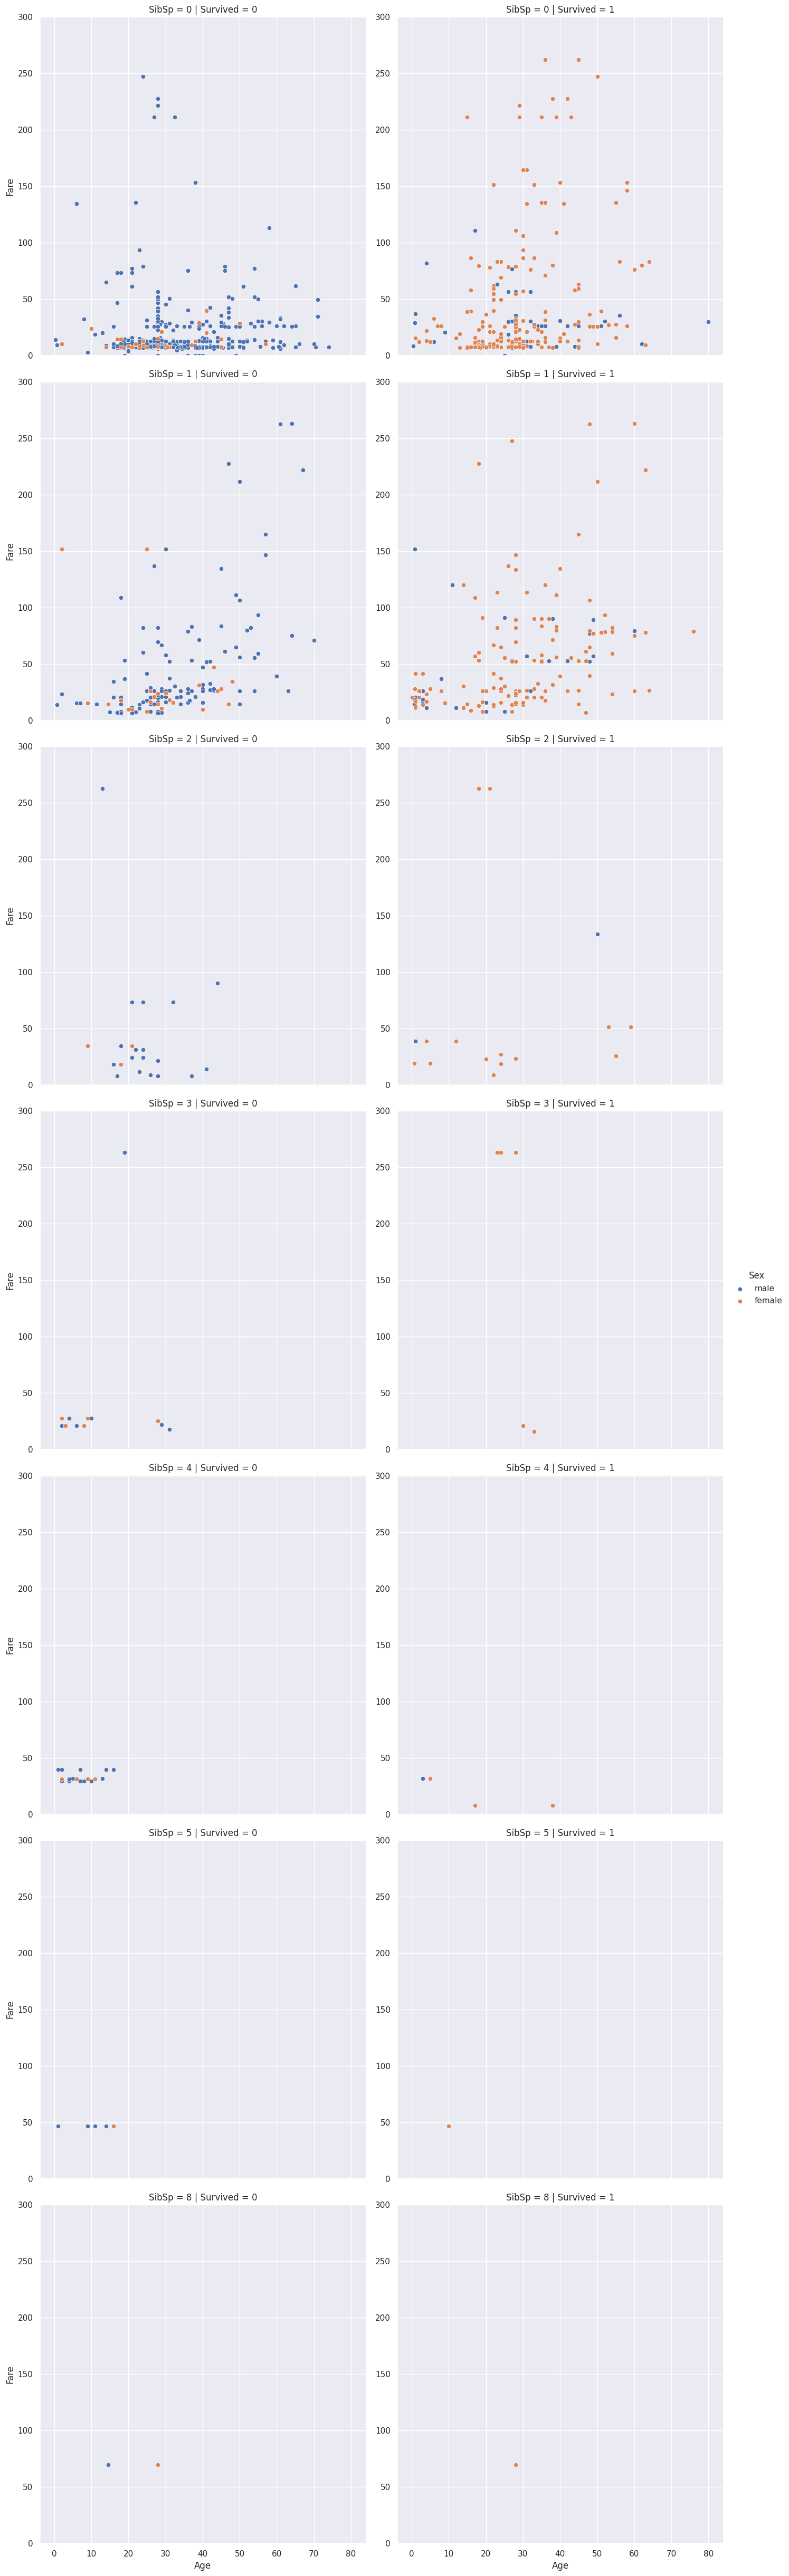

In [ ]:
# Comparison of Parch, Age, Sex and Survivors
g = sns.FacetGrid(df, col='Survived', row='SibSp', sharey=False, ylim=(0,300), hue='Sex', height=7)
g.map_dataframe(sns.scatterplot, x='Age', y='Fare')
g.set_axis_labels('Age', 'Fare')
g.add_legend()
# g.set_titles(col_template='', row_template='')
plt.show()

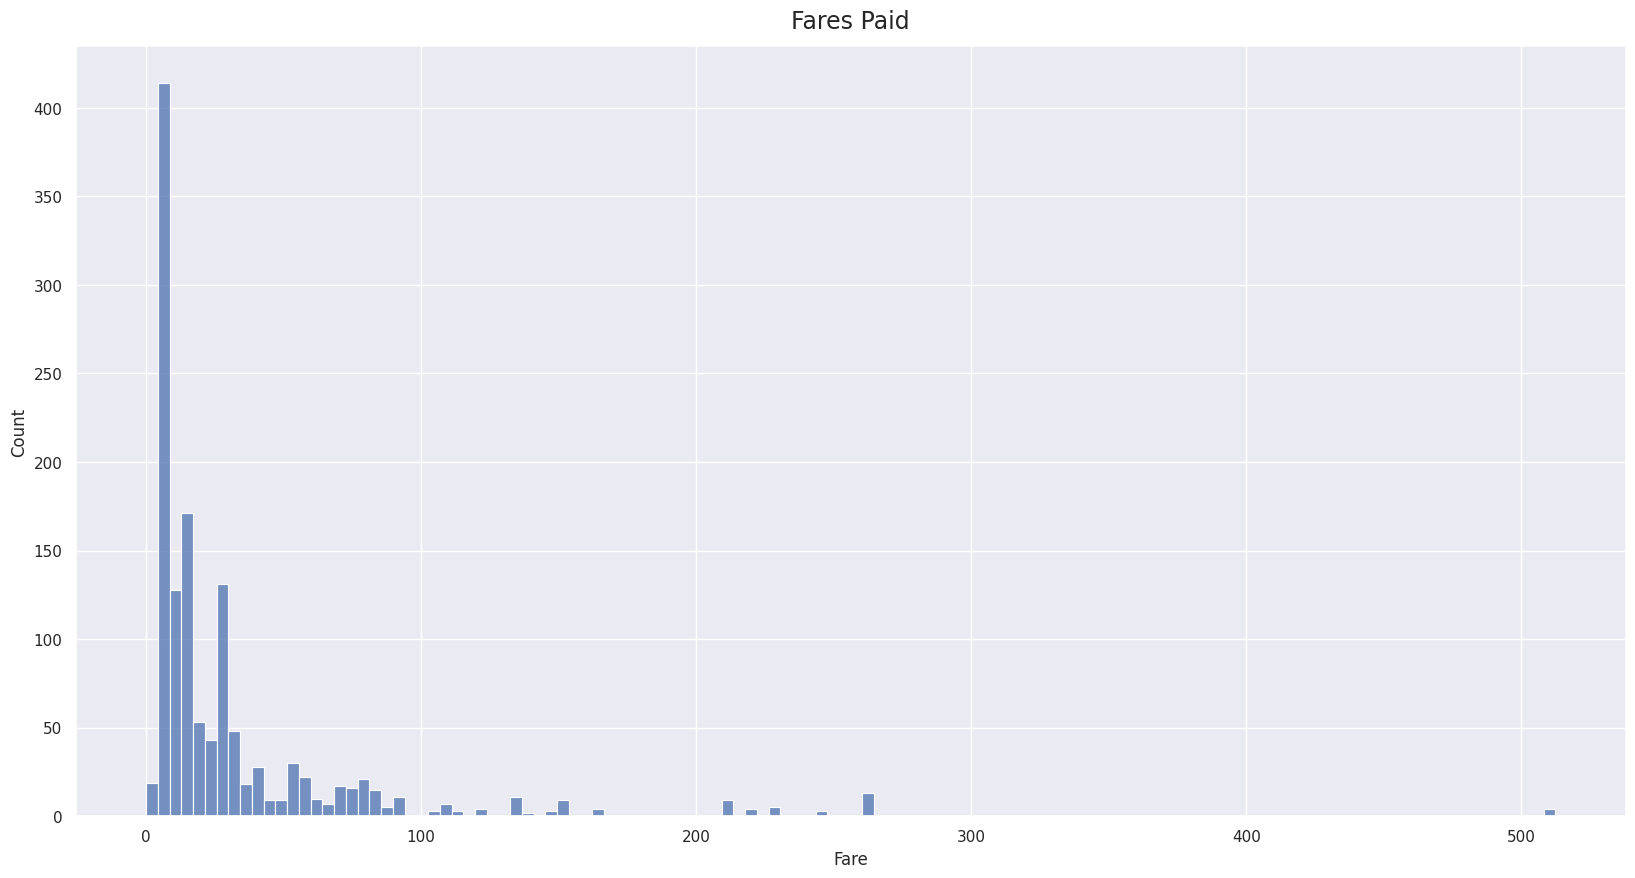

In [ ]:
plt.figure(figsize=(20,10))
sns.histplot(df.Fare)
plt.title('Fares Paid', size=17, pad=13)
plt.show()

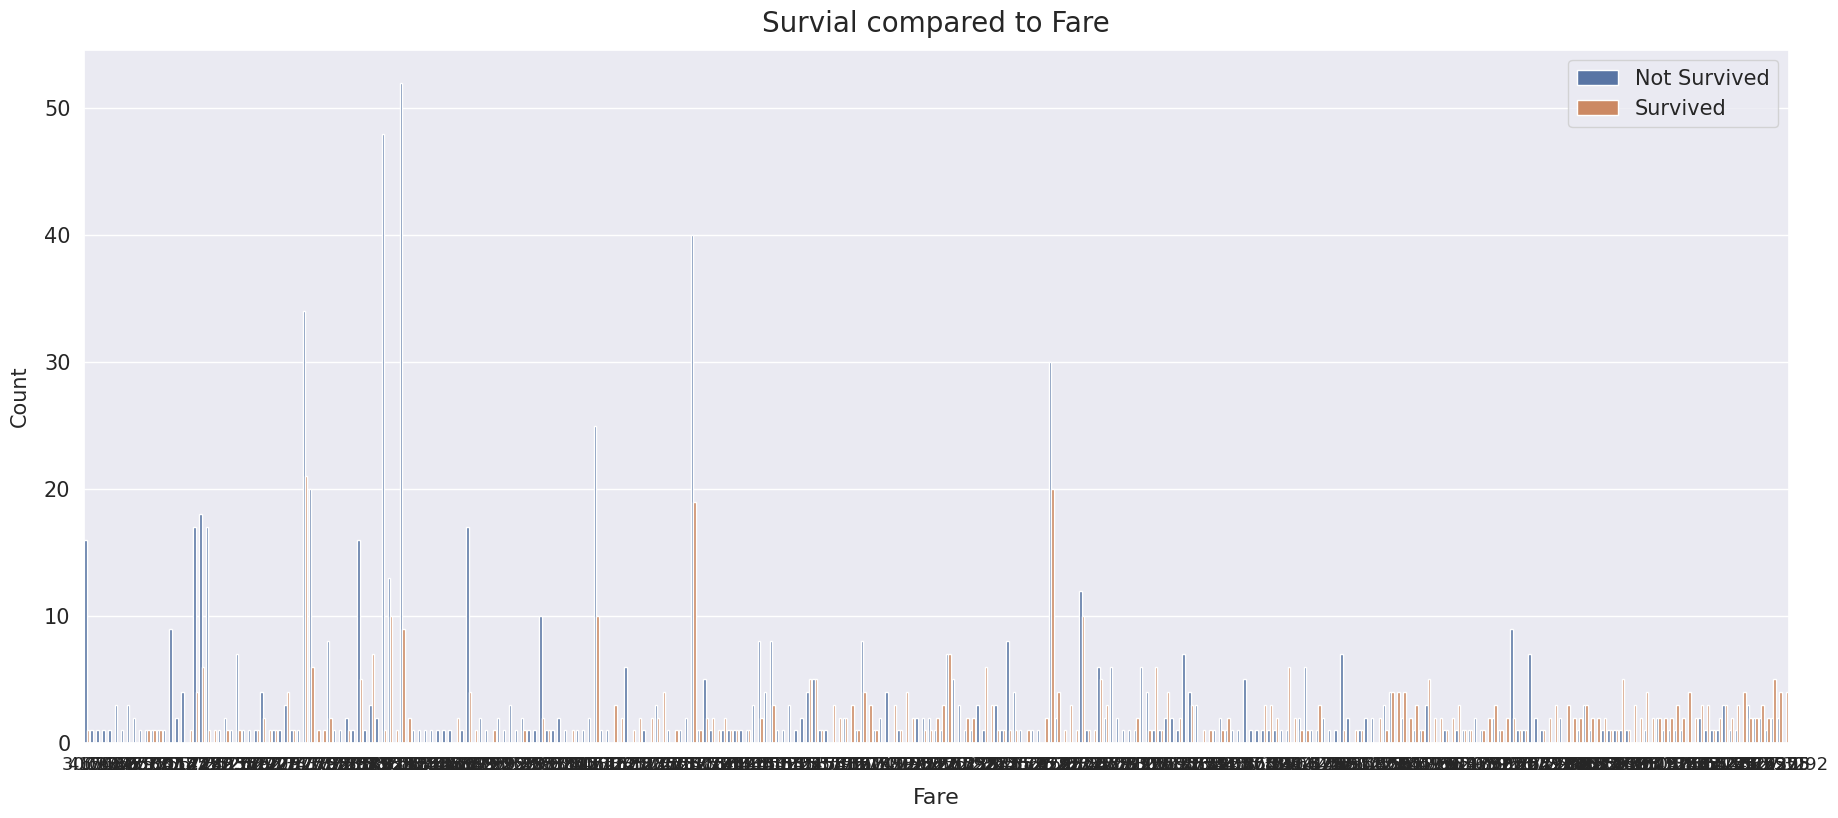

In [ ]:
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Fare', hue='Survived', data=df)
plt.xlabel('Fare', size=16, labelpad=10)
plt.ylabel('Count', size=15, labelpad=10)
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=15)
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Survial compared to Fare', size=20, y=1, pad=13)
plt.show()

What do you undersend/find from the analysis above (section 2.3.2.11)? Write in your own words in this cell.

Write below:

Here in the section 2.3.2.11 we used three different plot like scatter plot in FacetGrid, hist plot and countplot to figure out the cpmparison between different datas.

Firstly, we used scatter plot in FacetGrid to compare between Pclass,Age and Sex and survivors where we can see that - 

* 1st ticket holder who had given the fare in between 1 to 100 bucks had the most death rate but there are exceptions too.And, also the most survived passengers fare was also in between 1 to 150 bucks and in between 200 to 250 bucks.

* For the 2nd class and 3rd class ticket holder who had given the fare in between 1 to 50 bucks had the most survival rate and also the most not survived rate is also in between the fare 1 to 50 bucks.And the age is in between 10 to 50 for the survivors and for not survived passengers the age is in bewteen 10 to 50 as well.


Secondlly we used hist plot to figure out the number of passengers who had given higher fare and lower fare.Like,most of the passengers paid fare in between the 0 to 100 dollars and comparison to them A few or, 30 percent of the Passengers paid higher price for the ticket.


Thirdly, we used count plot to find out the survival rate of the passengers according to their fare.And, as we can see most of the passengers who are survived are paid less than 150 dollars or, under 100 dollars and the death rate is also higher from the lower fare which is almost proportinate to the survived rate.

## 3. Data Preprocessing

Explain your data preprocessing steps including filling null values, dropping duplicates, encoding, dimensionality reduction etc. whichever is applicable. Appropriate data preprocessing can hugely impact your model’s performance.

For encoding categorical variables you can use pandas (get_dummies).

Convert categorical variable into dummy/indicator variables.

Learn More:


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

**Examples**


In [ ]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
train11 = train_data.copy()
train11.drop(columns=['PassengerId','Name','Ticket','Cabin','Parch','Fare','SibSp','Pclass'],inplace=True)
train11.head()

,Survived,Sex,Age,Embarked
0,0,male,22.0,S
1,1,female,38.0,C
2,1,female,26.0,S
3,1,female,35.0,S
4,0,male,35.0,S


In [ ]:
data11 = train11.copy()
#data1 = pd.get_dummies(data1)
data11 = pd.get_dummies(data11, columns=['Sex','Embarked'])
data11.head()

,Survived,Age,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,0,1,0,0,1
1,1,38.0,1,0,1,0,0
2,1,26.0,1,0,0,0,1
3,1,35.0,1,0,0,0,1
4,0,35.0,0,1,0,0,1


**Now use the given dataset and perform the data preprocessing steps:**

In [ ]:
train1 = train_data.copy()
train1.drop(columns=['PassengerId','Name','Ticket','Cabin','Parch','Pclass'],inplace=True)

In [ ]:
data1 = train1.copy()
data1 = pd.get_dummies(data1, columns=['Sex','Embarked'])
data1.head()

,Survived,Age,SibSp,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,7.2500,0,1,0,0,1
1,1,38.0,1,71.2833,1,0,1,0,0
2,1,26.0,0,7.9250,1,0,0,0,1
3,1,35.0,1,53.1000,1,0,0,0,1
4,0,35.0,0,8.0500,0,1,0,0,1


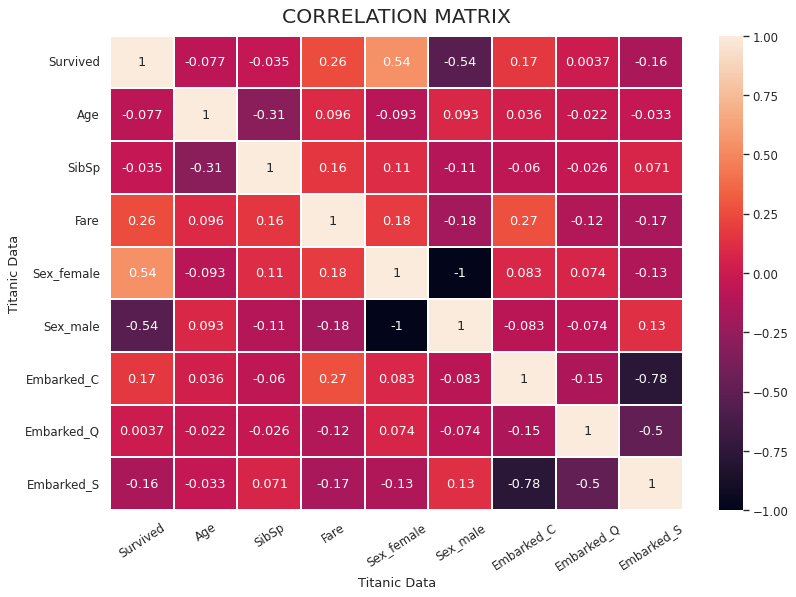

In [ ]:
correlation = data1.corr()
correlation
plt.figure(figsize=(12,8), dpi=77)
sns.heatmap(correlation, linecolor='white',linewidths=0.1, annot=True)
plt.title('Correlation Matrix'.upper(), size=19, pad=13)
plt.xlabel('Titanic Data')
plt.ylabel('Titanic Data')
plt.xticks(rotation=33)
plt.show()

**Droping duplicate**

In [ ]:
# Code Here (Add as many cells as you need)
data1.info()
data1.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Age         714 non-null    float64
 2   SibSp       891 non-null    int64  
 3   Fare        891 non-null    float64
 4   Sex_female  891 non-null    uint8  
 5   Sex_male    891 non-null    uint8  
 6   Embarked_C  891 non-null    uint8  
 7   Embarked_Q  891 non-null    uint8  
 8   Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(2), uint8(5)
memory usage: 32.3 KB


113

In [ ]:
data1.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886     True
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [ ]:
data1=data1.drop_duplicates()

In [ ]:
data1.duplicated().sum()

0

**Handleing Missing values**

In [ ]:
data1.isnull().sum()

Survived        0
Age           102
SibSp           0
Fare            0
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

Text(0, 0.5, 'Frequencies')

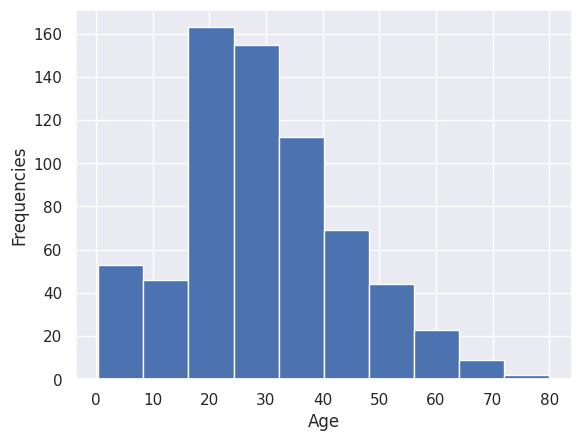

In [ ]:
plt.hist(data1['Age'])
plt.xlabel('Age')
plt.ylabel('Frequencies')

In [ ]:
data1['Age']= data1['Age'].fillna(data1['Age'].median())


In [ ]:
data1.isnull().sum()

Survived      0
Age           0
SibSp         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

### **Write Here**

 **What do you undersend/find from the analysis above (section 3)? Write in your own words in this cell.**

 After observing dataset , we found that it contains some duplciate and null values .So we dropped those duplicate values from the dataset . Our target variable is survival . We selected the columns sex,embark,age,sibsip,fare as our features and droped other variables beacuse they dont corelate with our target variable . We encoded the sex and embark column .
The age column contains 12 mising missing values . So we replaced the missing ages with the median . 

## 4.	Machine Learning Models



1.   Develop machine learning models. 
2.   You may try changing different parameters to obtain better training 
accuracy.
3. At least two models (with different parameters)



Provide a brief description of the machine learning models you used. (Provide a detailed description of their parameter)

Don’t copy-paste directly from the Internet! Write in your own words.

### 4.1 Use Logistic regression to build your ML model for the Titanic dataset.

At least two models (with different parameters). Hints: use the default parameters for one model and tuned-up (intuitively) parameter for improving accuracy.


In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import  cross_val_score
from sklearn.metrics import confusion_matrix
#Code Here
titanic_models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score"])
titanic_performance = pd.DataFrame(columns=["Model","Precision","Recall","F-1 Score","Accuracy"])

def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, Y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared


In [ ]:
def plot_confusion_matrix(y_test, y_pred):
  '''
  Plot the confusion matrix

  Params:
    - y_test
    - y_pred
  '''

  plt.figure(figsize=(6,4))

  sns.set(font_scale=1.2)
  sns.heatmap(
      confusion_matrix(y_test, y_pred), 
      xticklabels=np.unique(y_pred), 
      yticklabels=np.unique(y_test), 
      annot=True,
      annot_kws={"size": 12}, fmt='g')

  plt.title("Confusion matrix")
  plt.show()

**Logistic regression (Default )**

In [ ]:
# Code Here (Add as many cells as you need)
from sklearn.model_selection import train_test_split
x = data1.drop('Survived', axis=1)
y = data1['Survived']
x=x.values
y=y.values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
model_titanic1 = LogisticRegression() 
model_titanic1.fit(x_train, y_train)


LogisticRegression()

In [ ]:

predictions = model_titanic1.predict (x_test)
report = classification_report (y_test, predictions)
print (report)

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        91
           1       0.77      0.72      0.75        65

    accuracy                           0.79       156
   macro avg       0.79      0.78      0.79       156
weighted avg       0.79      0.79      0.79       156



In [ ]:
predictions = model_titanic1.predict(x_test)

report2 = classification_report (y_test, predictions,output_dict=True)
adding = {"Model": "Logistic Regresion- Defualt","Precision": report2['macro avg']['precision']*100, "Recall": report2['macro avg']['recall'] *100, "F-1 Score": report2['macro avg']['f1-score']*100,
          "Accuracy": report2['accuracy']*100}
titanic_performance = titanic_performance.append(adding, ignore_index=True)

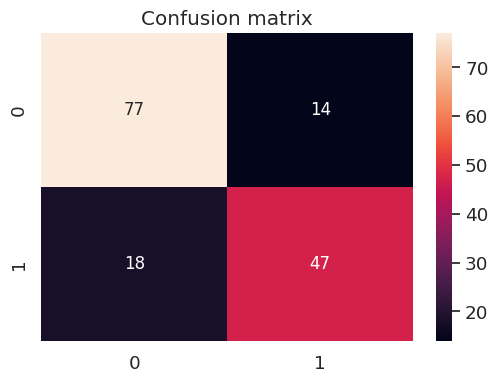

In [ ]:
pred2 = model_titanic1.predict(x_test)
plot_confusion_matrix(y_test, pred2)

In [ ]:
score=model_titanic1.score(x_test, y_test)*100
print("   Accuracy:",round(score, 2)," %")

   Accuracy: 79.49  %


**Logistic regression (Custom)**

In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
test_set_size = 0.2
seed = 1
X_train, X_test, Y_train, Y_test = model_selection.train_test_split (x,y, test_size = test_set_size, random_state = seed)
titanic_model2 = LogisticRegression (solver = 'liblinear',C=0.1)
titanic_model2.fit (X_train, Y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [ ]:
predictions = titanic_model2.predict (x_test)
report = classification_report (y_test, predictions)
print (report)

              precision    recall  f1-score   support

           0       0.81      0.86      0.83        91
           1       0.78      0.72      0.75        65

    accuracy                           0.80       156
   macro avg       0.80      0.79      0.79       156
weighted avg       0.80      0.80      0.80       156



In [ ]:
predictions = titanic_model2.predict(x_test)

report2 = classification_report (y_test, predictions,output_dict=True)
adding = {"Model": "Logistic Regresion- Custom","Precision": report2['macro avg']['precision']*100, "Recall": report2['macro avg']['recall']*100 , "F-1 Score": report2['macro avg']['f1-score']*100,
          "Accuracy": report2['accuracy']*100}
titanic_performance = titanic_performance.append(adding, ignore_index=True)

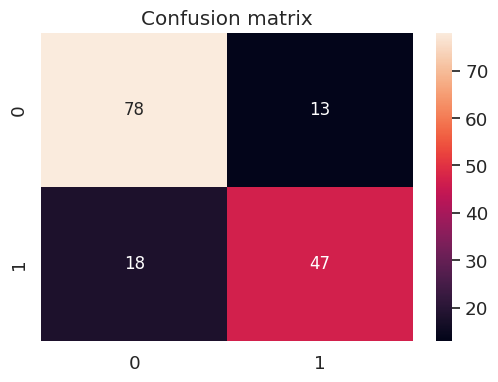

In [ ]:
pred3 = titanic_model2.predict(x_test)
plot_confusion_matrix(y_test, pred3)

In [ ]:
score=titanic_model2.score(x_test, y_test)*100
print("   Accuracy:",round(score, 2)," %")

   Accuracy: 80.13  %


**Write Here**

What do you undersend this above (section 4.1)? Write in your own words in this cell.

We developed two logistic regression model on our datset .One with default parameter and another with custom paramter . Accuracy of default model is 77.49% and custom parameter is 80.13% 

### 4.2 First analyse the 'Advertising dataset' as like you have observed in Titanic dataset. Then, use Linear Regression to build your ML model for the Advertising dataset. 

At least two models (with different parameters). Hints: use the default parameters for one model and tuned-up (intuitively) parameter for improving accuracy. 


In [ ]:
# Code Here (Add as many cells as you need)
advertise_data = pd.read_csv("/content/drive/MyDrive/advertising.csv")

In [ ]:
advertise_data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


**Cleaing Data**

In [ ]:
advertise_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
advertise_data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
advertise_data.duplicated().sum()

0

<Axes: xlabel='Newspaper', ylabel='Sales'>

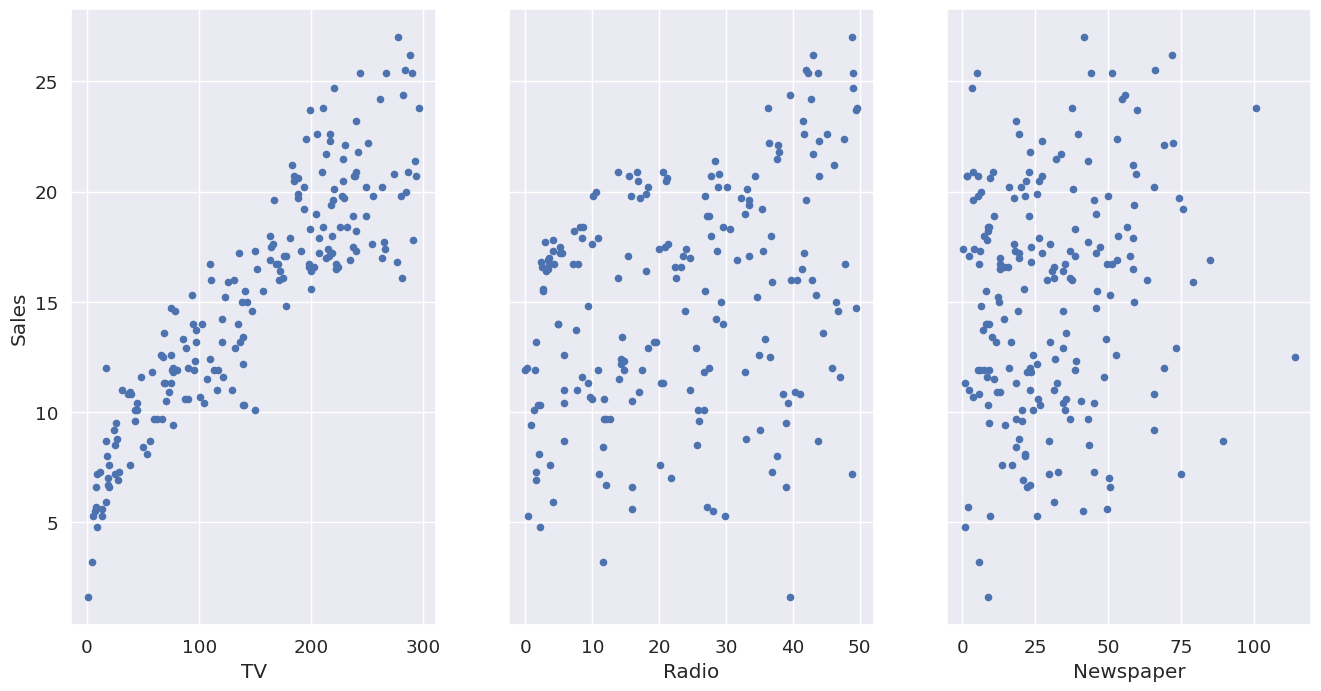

In [ ]:
fig,axs= plt.subplots(1,3,sharey=True) 
advertise_data.plot(kind="scatter",x='TV',y='Sales',ax=axs[0],figsize=(13,5))
advertise_data.plot(kind="scatter",x='Radio',y='Sales',ax=axs[1],figsize=(16,8))
advertise_data.plot(kind="scatter",x='Newspaper',y='Sales',ax=axs[2],figsize=(16,8))

**Model- 1 (Deafult Parameter)**

In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn import model_selection
feature_x=['TV','Radio','Newspaper']
X=advertise_data[feature_x]
y=advertise_data.Sales

X=X.values
y=y.values

xtrain,xtest,ytrain,ytest=model_selection.train_test_split(X,y,test_size=0.3,random_state=30)


In [ ]:
linear_model=LinearRegression()
linear_model.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
#Testing the model 
dat = [[5,50,50]]

probability = linear_model.predict(dat)
probability

array([10.04174701])

In [ ]:
score=linear_model.score(xtest, ytest)*100
print("   Accuracy:",round(score, 2)," %")

   Accuracy: 91.19  %



**Model - 2 with CUSTOM PARAMETER**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

model_2 = LinearRegression()

param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True,False],
    'positive': [True,False]   
}


grid_search = GridSearchCV(estimator=model_2, param_grid=param_grid, cv=5)


grid_search.fit(X, y)


print("Best hyperparameters: ", grid_search.best_params_)

model_2 = LinearRegression(**grid_search.best_params_)
model_2.fit(X, y)



Best hyperparameters:  {'copy_X': True, 'fit_intercept': True, 'positive': True}


LinearRegression(positive=True)

In [ ]:
score=model_2.score(xtest, ytest)*100
print("   Accuracy:",round(score, 2)," %")

   Accuracy: 92.3  %


**Write Here**

We developed two linear regression model on advertise dataset .One with deafult parameter and another with custom parameter . The scope of parameter tuning on a linear regression model is very low.We used grid search method to find out the best fitted parameter for  our regression model . Model with default parameter gives accuracy of 91.19% and tuned model gives 92.3% accuracy .

## 5.	Performance Evaluation and Discussion

Use charts and figures appropriately to visualize and compare the performance of different models (for both the dataset, provide seperate comparison). Add as many cells as you need.

\

Analyze the performance of the models and provide your hypothesis behind their performance, e.g. Why are some models performing better than others? Provide appropriate reasoning for your hypothesis. 

**Titanic dataset**

In [ ]:
#performance chart
titanic_performance.sort_values(by="Accuracy",ascending=False)

,Model,Precision,Recall,F-1 Score,Accuracy
0,Logistic Regresion- Custom,79.791667,79.010989,79.311230,80.128205
1,Logistic Regresion- Defualt,79.050906,78.461538,78.699437,79.487179


Confusion  Martix of Custom tuned model


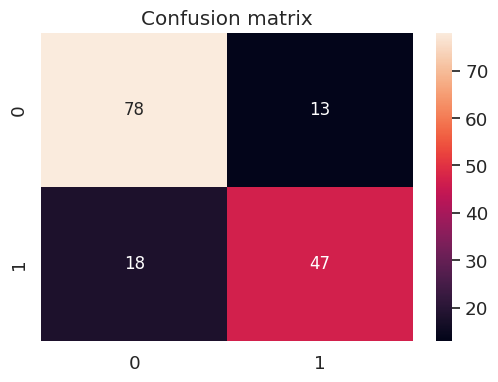

Confusion  Martix of default model


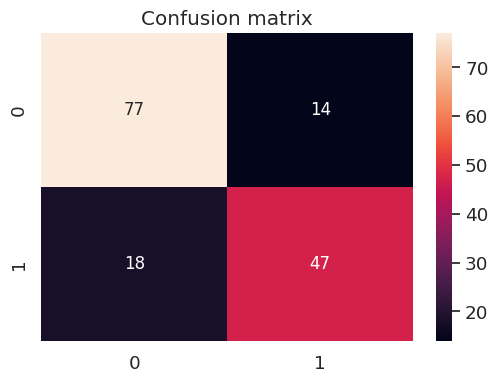

In [ ]:
print("Confusion  Martix of Custom tuned model")
pred = titanic_model2.predict(x_test)
plot_confusion_matrix(y_test, pred)
print("Confusion  Martix of default model")
pred2 = model_titanic1.predict(x_test)
plot_confusion_matrix(y_test, pred2)

### **Write Here**
**Titanic Dataset**


**Performance Chart** 
We can use accuracy measure when we are working on binary classification.As our dataset is balanced enough , the chance of the  models  geting biased on classes is very less.From the Performance chart we can see that **Logistic regression with Custom  parameter (80.12%)** gives better accuracy than the other model. (79.48%)
So , **Logistic regression with Custom  parameter (80.12%)** model will give more accurate prediction than other models we developed .

**Advertising Dataset**
 We used **GRID SEARCH** for tuning parameter in our advertising dataset , which helps to find the best fitted parameter for the model itself.In Default parameter, the accuracy was 91.19% and after tuning the parameter ,the accuracy increased to 92.3% .So there is a slight change due to parameter tuning .

**Why Some Performing better ?**

There can be many factors which causes one model performing better than another. The mechanism , wokring process with default parameter of models and complexity of datasets can be reasons behind it.Different models are designed to work better on different types of problems. linear regression works well on problems with linear relationships between the input and output variables, A support vector machine (SVM) ML algorithm that performs classification or regression tasks by constructing a divider that separates data in two categories.After applying different algorithms on our dataset we are achieving diffefent accuracy and results beacuse of their diffrent working process.

Sometimes a model that is too simple may not capture all the relevant features in the data, while a model that is too complex may overfit to the training data and not generalize well to new data. Therefore, finding the optimal balance between model complexity and performance is very important .

Model parameter tuning is one of the reason of getting diffrent performance result from diffrent models.We changed solver algorithm to optimize our model , changed the noramalization strength of our models and each of the models gave us diffrent accuracy results.

Model performance also depends on feature selection . In our model we droped class column and consider embarked column instead.Both were corelated to the target value .Accuracy could have been diffrent of we considered class column .So, feature selection is also big facotor behind model perfdormance 

In short, the performance of a model depends on factors like choice of algorithm, model complexity, feature selection, parameter tuning , and data quality and quantity.
